# Cell Phone Price Range

We are going to analyze Cell Phone Price Range dataset and build a Machine Learning model to predict the quality:-

<img src="image123.jpg" width="">

# Contents

* PROBLEM STATEMENT
* DATASET
* DATA FIELDS
* DOMAIN ANALYSIS REPORT
* DATA DESCRIPTION
  - Insights from Data Description
* DATA DISTRIBUTION
  - Distribution of data using value_counts
  - Distribution of data using Pie Chart
* EDA (EXPLORATORY DATA ANALYSIS) 
  - Univariate Analysis
    - Univariate Analysis using Sweetviz
    - Insights with sweetviz
    - Univariate Analysis using Histogram
    - Univariate Analysis using Kernel Density Plot
    - Univariate Analysis using Countplot
  - Bivariate Analysis
    - Bivariate Analysis using Relplot
    - Bivariate Analysis using Barplot
    - Bivariate Analysis using Lineplot
    - Bivariate Analysis using Histplot
* DATA PREPROCESSING
  - Finding Outliers
  - Handling Outliers
  - Scaling with MinMaxScaler
* FEATURE SELECTION
  - Heatmap
* TASK 1
  - Data Analysis Report
* MODEL CREATION
  - Train Test Split
  - Smoting Technique
* MODEL EVALUATION
  - Logistic Regression
  - OneVsRest Classifier
  - Support Vector Machine
  - K-Nearest Neighbor
  - Decision Tree Classifier
  - Random Forest Classifier
  - Gradient Boosting
  - Xtreme Gradient Boost
  - Artificial Neural Network
* TASK 2
* MODEL COMPARISON REPORT
* TASK 3
  -  Business Analysis Report
* CHALLENGES FACED
* CONCLUSION

# Problem Statement

##### Task 1:-Prepare a complete data analysis report on the given data.

##### Task 2:-On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc predict the Price range of the mobile.

##### Task 3:- Prepare the analysis report stating how model will help expanding the business by stating several factors including feature importance.


In [2]:
# Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

## Dataset

In [3]:
data = pd.read_csv("cellphone_price_range.csv")
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


* I have changed the file description from 'datasets_11167_15520_train.csv' to 'cellphone_price_range.csv'

## Data Fields

●	battery_power - Total energy a battery can store in one time measured in mAh

●	blue - Has bluetooth or not

●	clock_speed - speed at which microprocessor executes instructions

●	dual_sim - Has dual sim support or not

●	fc - Front Camera mega pixels

●	four_g - Has 4G or not

●	int_memory - Internal Memory in Gigabytes

●	m_dep - Mobile Depth in cm

●	mobile_wt - Weight of mobile phone

●	n_cores - Number of cores of processor

●	pc - Primary Camera mega pixels

●	px_height - Pixel Resolution Height

●	px_width - Pixel Resolution Width

●	ram - Random Access Memory in Megabytes

●	sc_h - Screen Height of mobile in cm

●	sc_w - Screen Width of mobile in cm

●	talk_time - longest time that a single battery charge will last when you are

●	three_g - Has 3G or not

●	touch_screen - Has touch screen or not

●	wifi - Has wifi or not

●	price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).


## Domain Analysis Report: Cell Phone Price Range Dataset

#### Introduction to the Domain:

The dataset focuses on various features related to cell phones, including technical specifications and features that influence the pricing of mobile devices.

#### Key Variables:

The primary variables of interest include battery power, presence of Bluetooth, clock speed, dual SIM support, front and primary camera resolutions, internal memory, mobile depth, weight, number of processor cores, pixel resolution, RAM, screen height and width, talk time, presence of 3G and 4G, touch screen functionality, and Wi-Fi support. The target variable is the price range categorized into four levels: low cost (0), medium cost (1), high cost (2), and very high cost (3).

* We will explore overall market trends in the cell phone industry and how technological advancements, new releases, and consumer demand impact pricing.

* We will examine how consumer preferences for features like RAM support, camera quality etc. within different cost categories.

* We will assess the quality and integrity of the data, addressing any issues related to outliers, missing data, or potential biases that could impact the analysis.

* We will provide insights into potential future trends in cell phone pricing based on historical data and market dynamics.

* We will summarize key findings and insights from the domain analysis, highlighting important factors that influence cell phone prices and the target variable, price range. This analysis will serve as a foundation for further exploration and modeling of the dataset.

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# Data Description

In [4]:
pd.set_option('display.max_columns',None)
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Insights from data description
1) There is no missing values in our dataset.

2) The maximum energy a battery stored in one time is 1998 mAh (good for small devices or application)

3) The maximum front camera mega pixel is 19 mega pixel (high resolution)

4) There are 50% devices with bluetooth in it in your mobile company.

5) Highest storage provided by your mobile company for any mobile is 64 GB.

6) Highest weight of mobile is 200 g.

7) 8 cores of processor is the highest.

8) 20 mega pixel is the highest mega pixel in your mobile device.

9) 3998 megabytes is the highest RAM storage

10) 76% are the chances of having the 3G mobile phone.


# Data Distribution (For columns less than 30 distinct values)

## Distribution of data using value_counts

In [5]:
data.blue.value_counts()

0    1010
1     990
Name: blue, dtype: int64

In [6]:
data.clock_speed.value_counts()

0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
1.5     67
2.0     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
0.9     58
2.4     58
0.8     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0     28
Name: clock_speed, dtype: int64

In [7]:
data.dual_sim.value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

In [8]:
data.fc.value_counts()

0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: fc, dtype: int64

In [9]:
data.four_g.value_counts()

1    1043
0     957
Name: four_g, dtype: int64

In [10]:
data.m_dep.value_counts()

0.1    320
0.2    213
0.8    208
0.5    205
0.7    200
0.3    199
0.9    195
0.6    186
0.4    168
1.0    106
Name: m_dep, dtype: int64

In [11]:
data.n_cores.value_counts()

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

In [12]:
data.pc.value_counts()

10    122
7     119
9     112
20    110
1     104
14    104
0     101
2      99
17     99
6      95
4      95
3      93
15     92
12     90
8      89
16     88
13     85
19     83
18     82
11     79
5      59
Name: pc, dtype: int64

In [13]:
data.sc_h.value_counts()

17    193
12    157
7     151
16    143
14    143
15    135
13    131
11    126
10    125
9     124
19    124
18    120
8     117
6     114
5      97
Name: sc_h, dtype: int64

In [14]:
data.sc_w.value_counts()

1     210
3     199
4     182
0     180
5     161
2     156
7     132
6     130
8     125
10    107
9      97
11     84
12     68
13     49
14     33
15     31
16     29
17     19
18      8
Name: sc_w, dtype: int64

In [15]:
data.talk_time.value_counts()

7     124
4     123
16    116
15    115
19    113
6     111
10    105
8     104
11    103
20    102
14    101
13    100
18    100
9     100
2      99
12     99
17     98
3      94
5      93
Name: talk_time, dtype: int64

In [16]:
data.three_g.value_counts()

1    1523
0     477
Name: three_g, dtype: int64

In [17]:
data.touch_screen.value_counts()

1    1006
0     994
Name: touch_screen, dtype: int64

In [18]:
data.wifi.value_counts()

1    1014
0     986
Name: wifi, dtype: int64

In [19]:
data.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

## Distribution of data using pie chart
#### Just select the column you want to view from the drop down menu.

In [20]:
import matplotlib.pyplot as plt
from ipywidgets import interact

# Function to create pie charts for selected columns
def plot_pie(column_name):
    plt.figure(figsize=(8,8), facecolor='white')
    
    category_counts = data[column_name].value_counts()
    plt.pie(category_counts, labels=category_counts.index, autopct='%.2f%%', startangle=90, textprops={'fontsize': 12})
    plt.title(f'Distribution of {column_name}', fontsize=15)
    plt.show()

# Get the list of columns for which you want to create pie charts
columns_for_pie = ['blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'm_dep', 'n_cores', 'pc', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']

# Create an interactive widget with a dropdown menu
interact(plot_pie, column_name=columns_for_pie)


interactive(children=(Dropdown(description='column_name', options=('blue', 'clock_speed', 'dual_sim', 'fc', 'f…

<function __main__.plot_pie(column_name)>

# EDA (Exploratory Data Analysis)

## Univariate Analysis

### Univariate Analysis using sweetviz

In [20]:
!pip install sweetviz

In [20]:
import sweetviz as sv 
my_report = sv.analyze(data)
my_report.show_html() 

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Insight through sweetviz
1) Most of the mobile phones has clock speed nearly upto 0.5 (that is 20 % in our dataset)

2) There are 50 % chances that the mobile device has a bluetooth in it.

3) 51 % have dual sim and 49 % dont have dual sim.

4) There may be corrupted data as some mobiles have zero mega pixel front camera (23.7 %).

5) 52 % mobile has 4G.

6) There are 16 % (the most) mobiles having 0.1 cm mobile depth.

7) 182 is the highest weight of mobile in our dataset.

8) Most of the mobiles has 4 number of cores of processor (14 %).

9) Most of the mobile has 10 mega pixel primary camera (6.1 %).

10) Highest screen height of any mobile is 19 cm (only 6.2 % mobile have such height)

11) Maximum screen width is 18 cm (0.4 %).

12) 76 % mobiles are 3G.

13) Nearly 50 % are feature phones (dont have touch screen) and 50 % are smartphones.

14) 51 % mobile have wifi feature in it.

15) Price Ranges are distributed equally. Every price range include 500 mobile phones making it total 2000.

### Univariate analysis using histogram

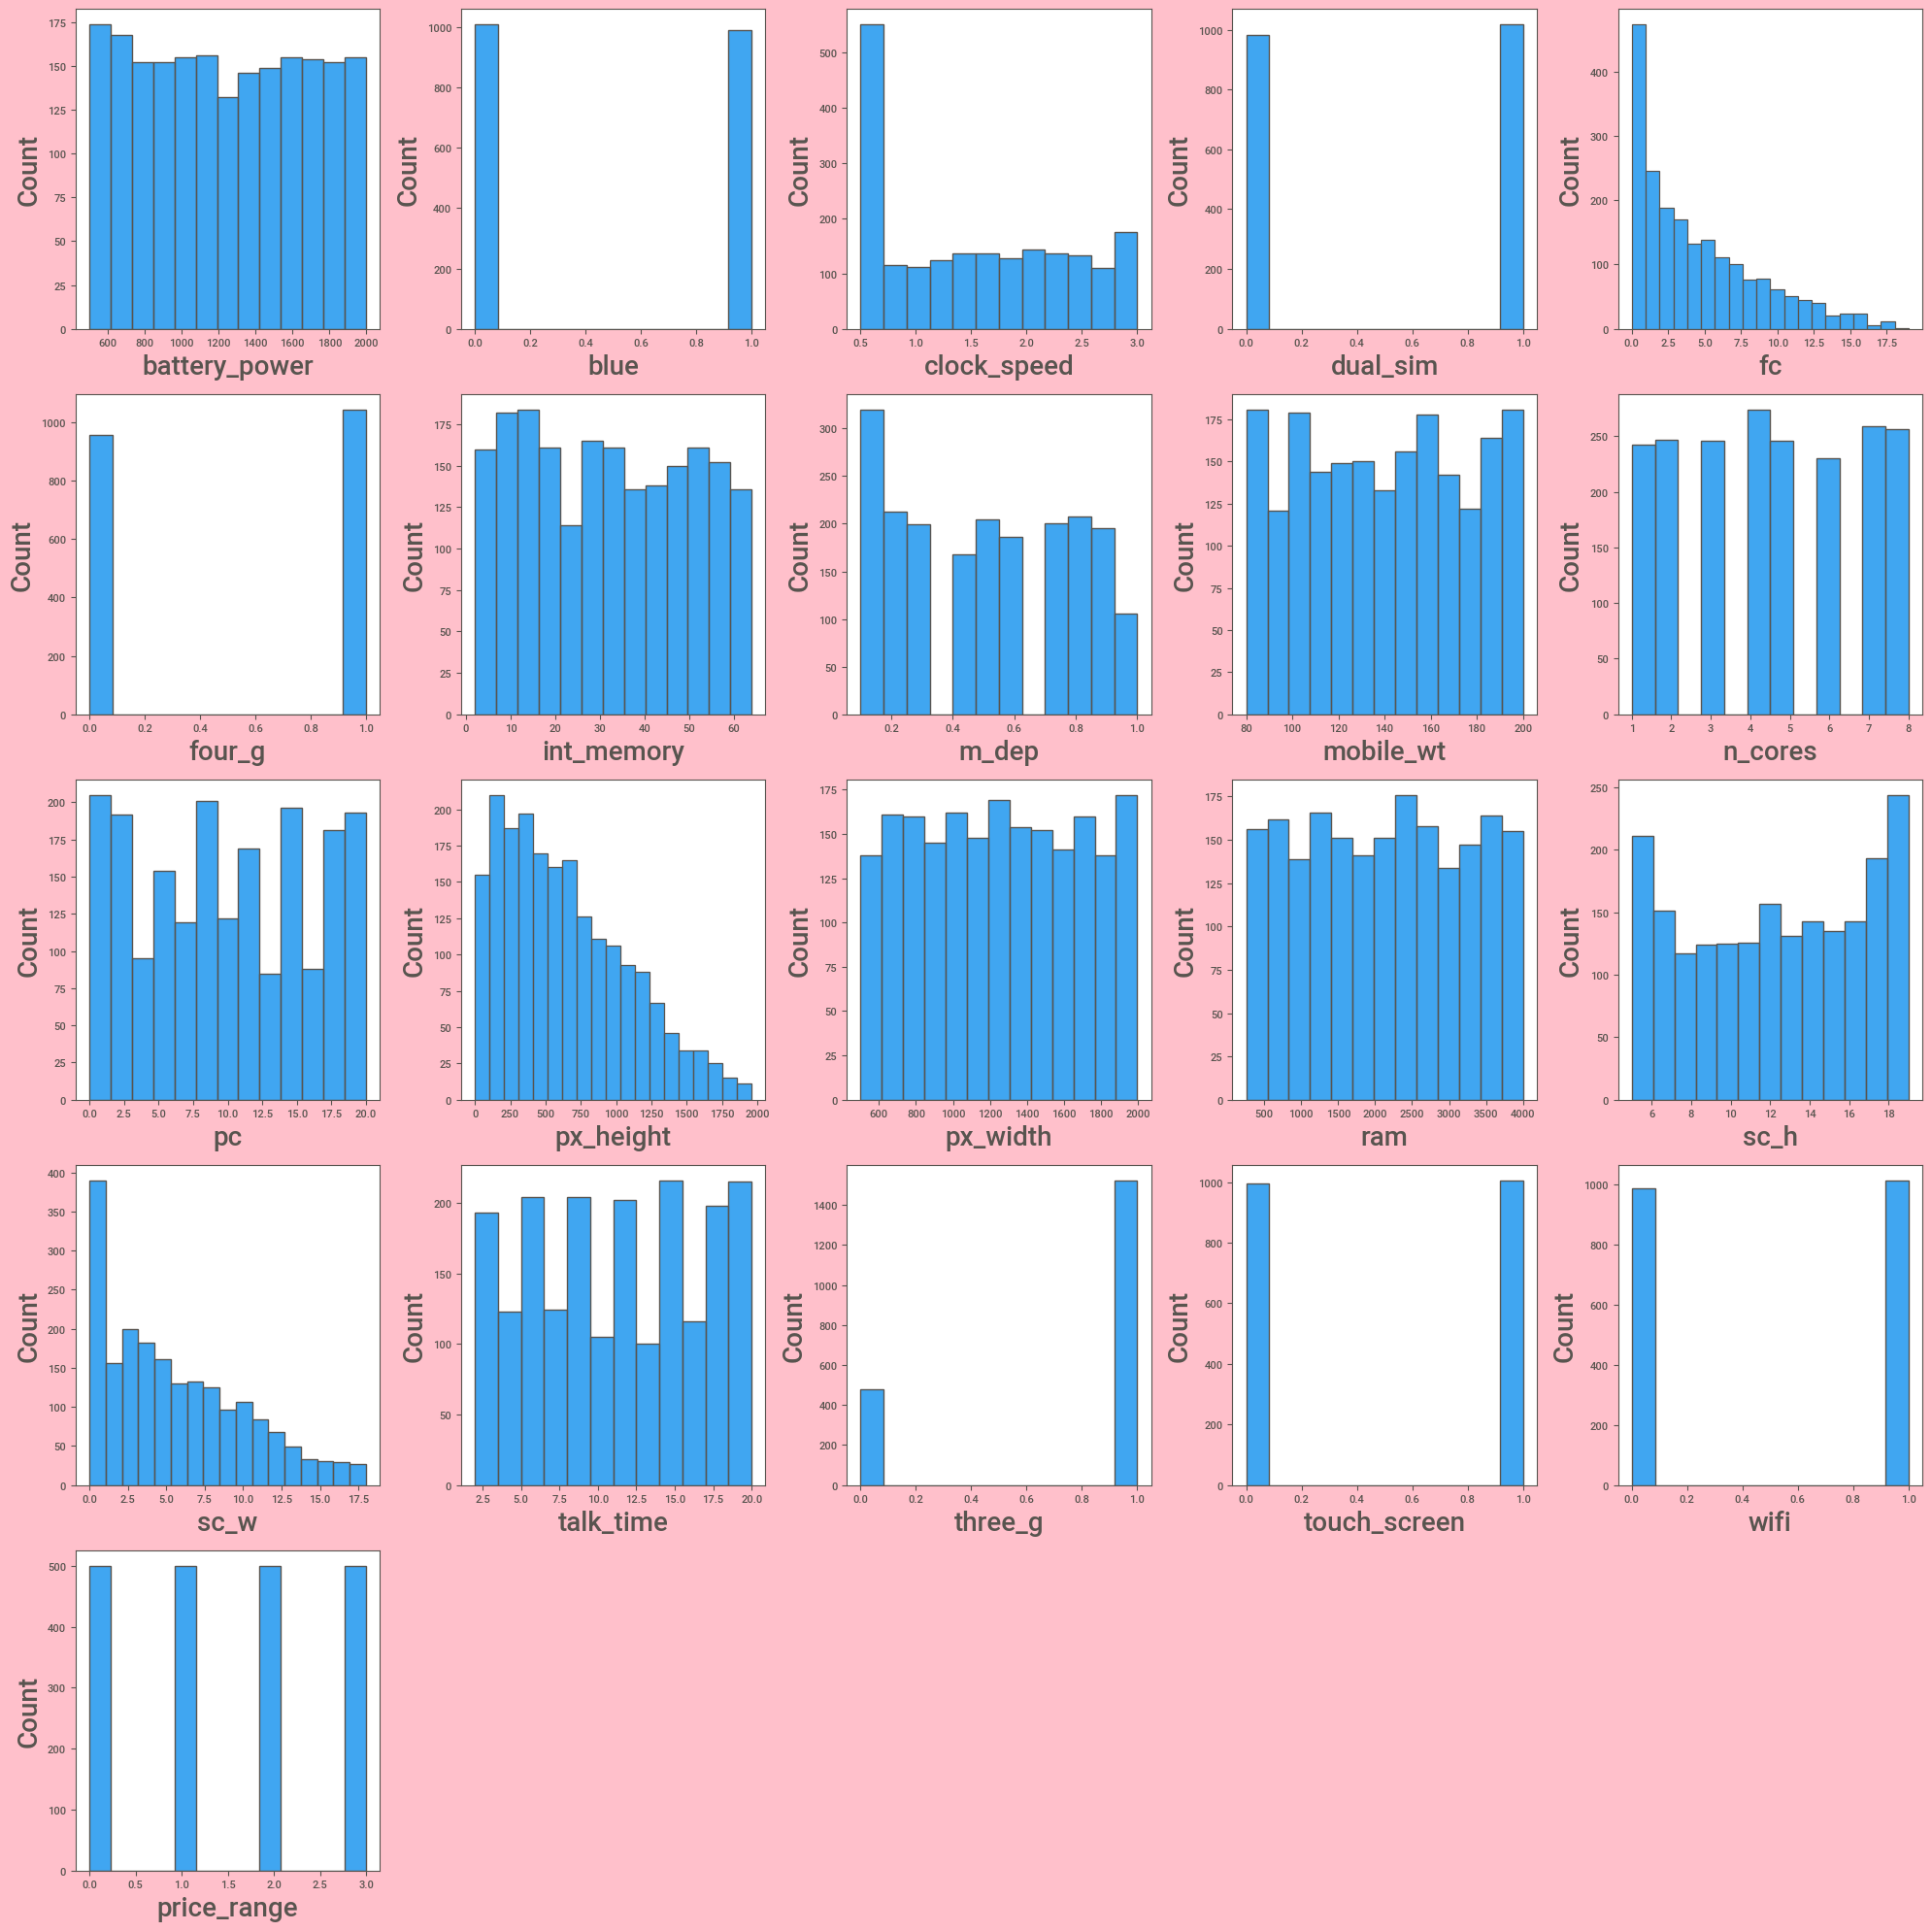

In [22]:
plt.figure(figsize=(20,20), facecolor='pink')

plotnumber=1

for column in data:
    ax = plt.subplot(5,5,plotnumber)
    sns.histplot(data[column])
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plotnumber+=1

plt.tight_layout()

##### Insights:-
The histograms help analyze the count or frequency of values in each feature, providing insights into the data's central tendencies and potential patterns. You can see the graphs showing the counts of all columns.

### Univariate analysis using Kernel Density Plot

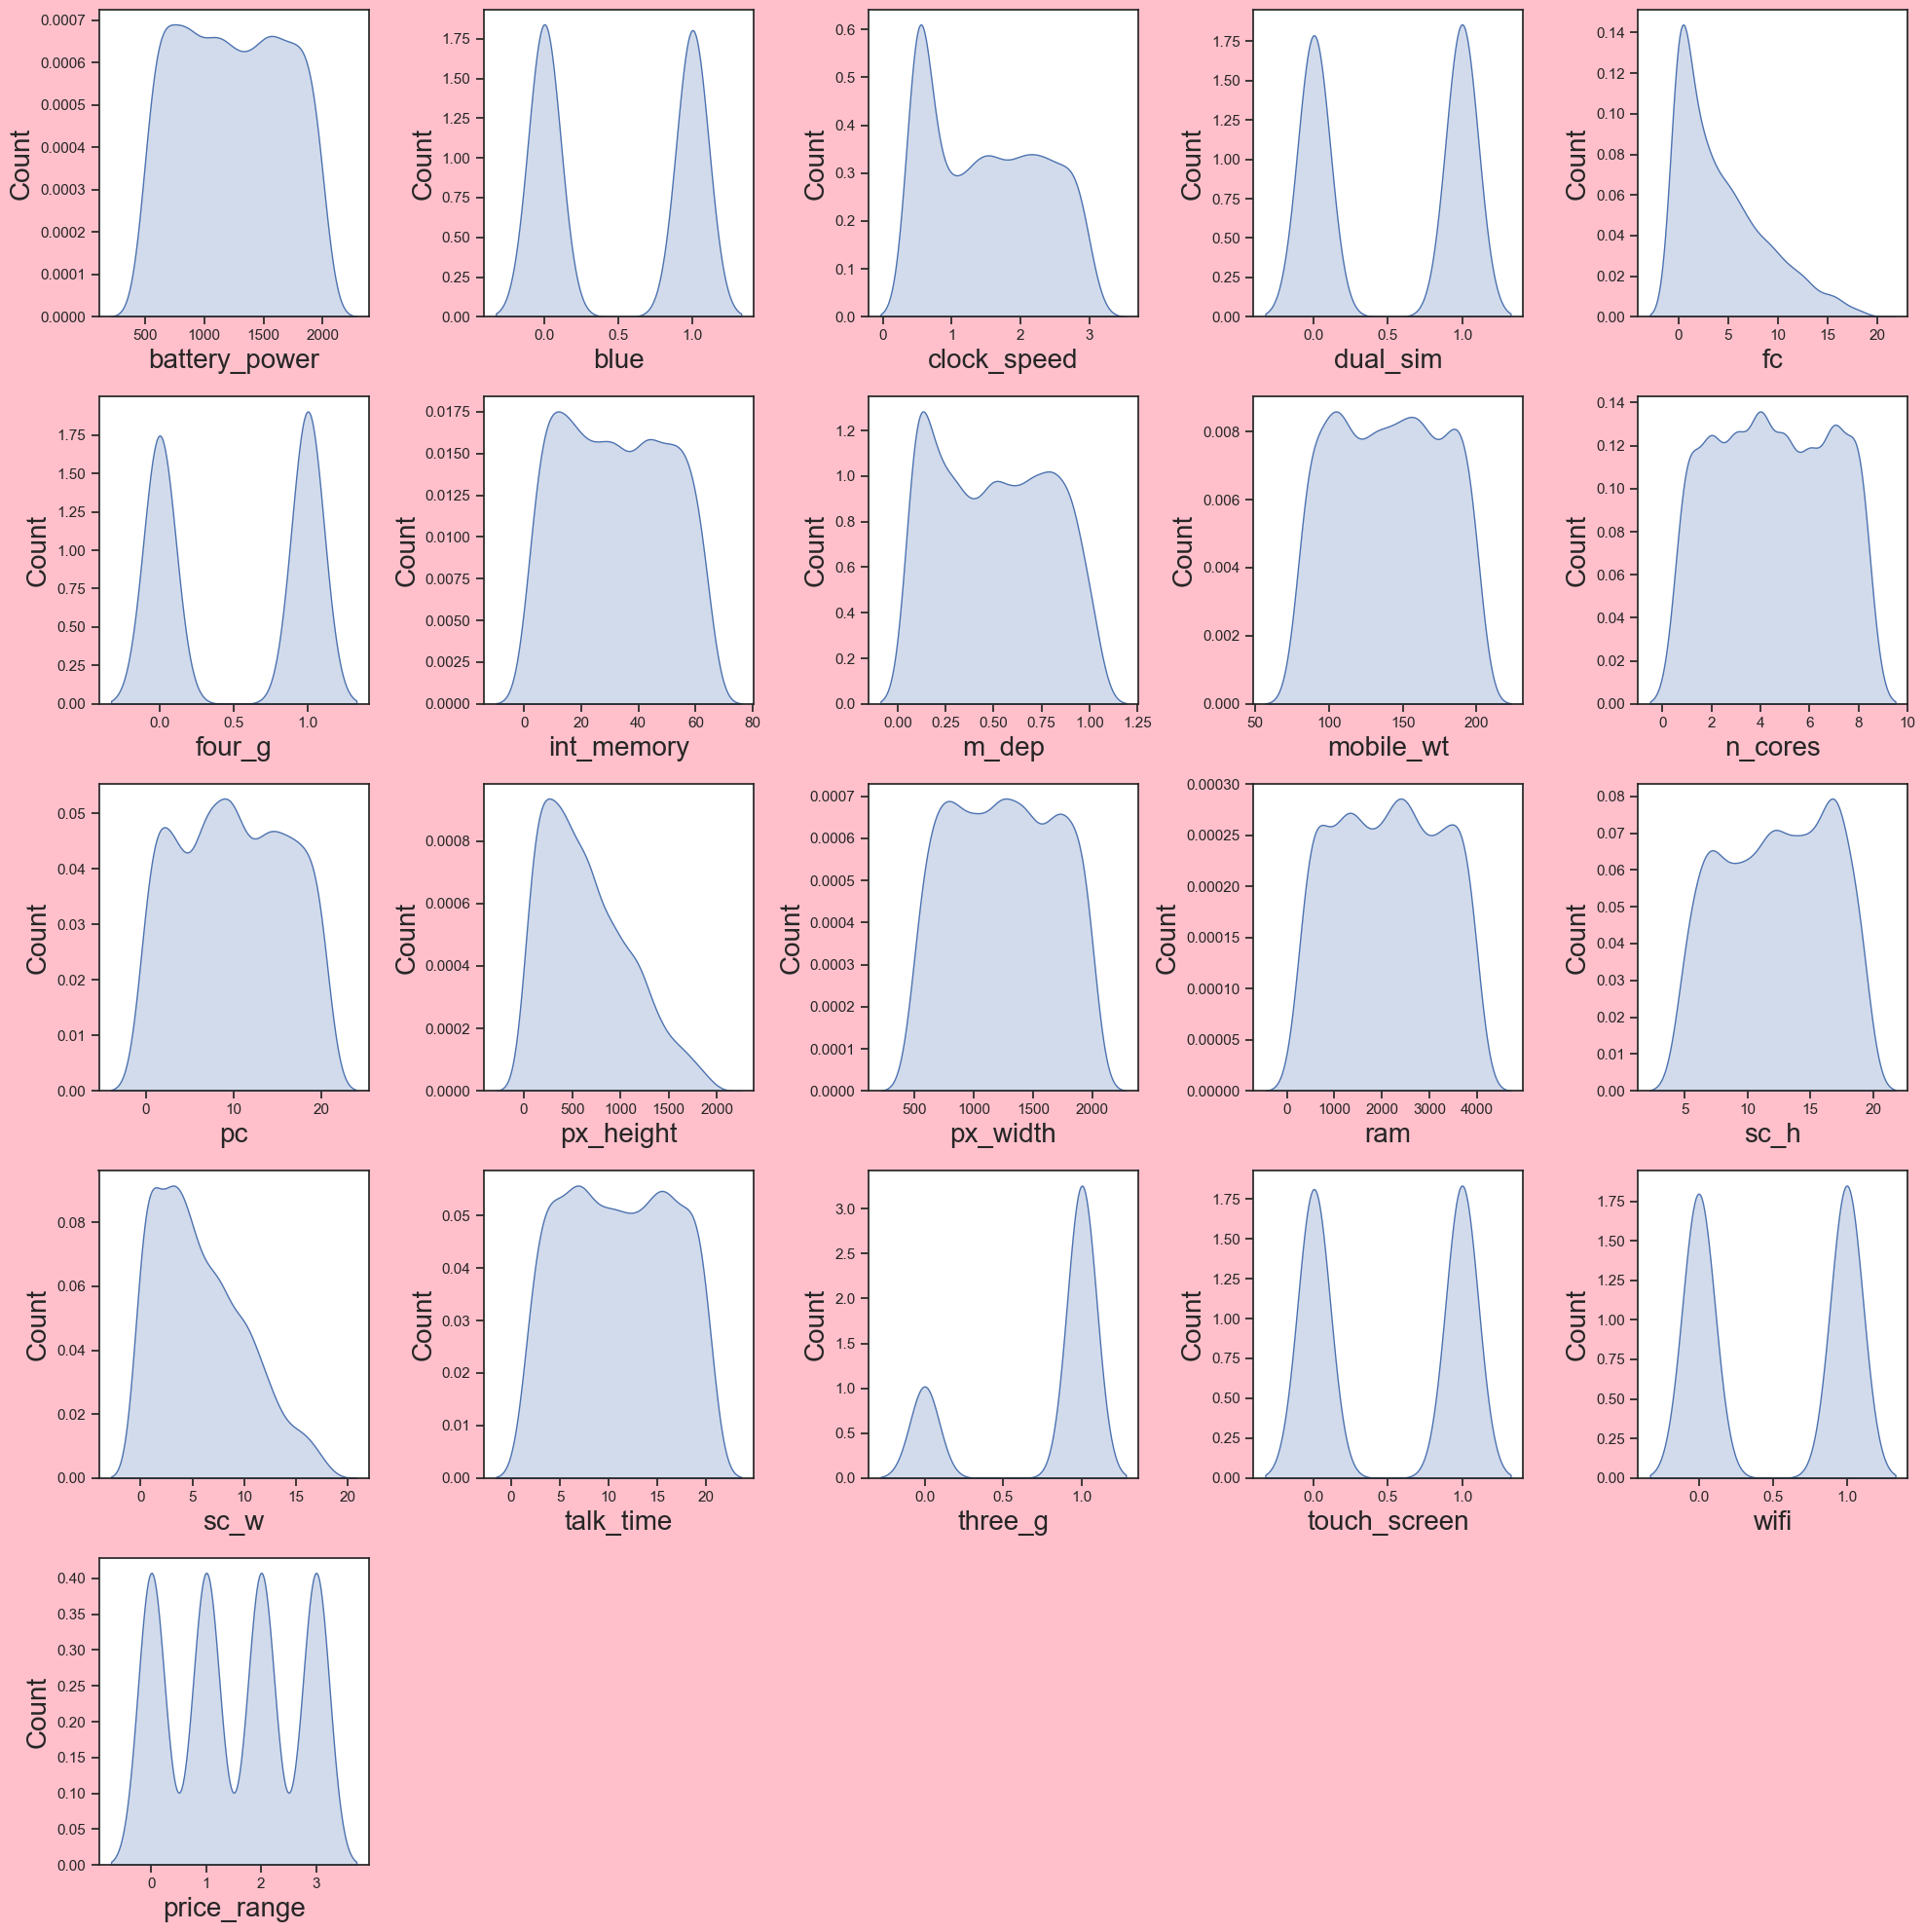

In [176]:
plt.figure(figsize=(20,20), facecolor='pink')

plotnumber=1

for column in data:
    ax = plt.subplot(5,5,plotnumber)
    sns.kdeplot(data[column], fill=True)
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plotnumber+=1

plt.tight_layout()

##### Insights :-

* Features like battery_power, int_memory, mobile_wt, n_cores, pc, px_width, ram, sc_h, talk_time etc. are normally distributed.
* Features likeclock_speed, fc, px_height, sc_w etc. are skewed.

### Univariate analysis using countplot (for screen width)

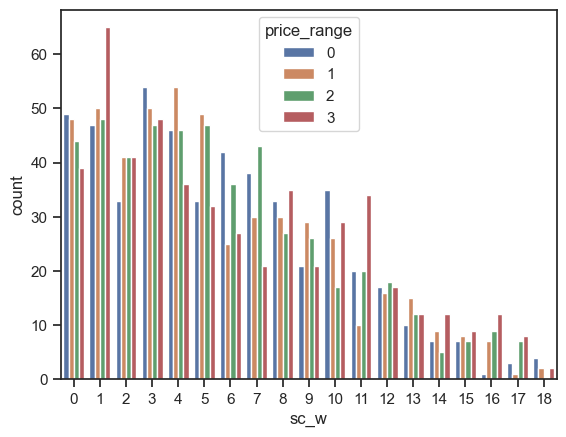

In [142]:
sns.countplot(x='sc_w',hue='price_range',data=data)
plt.show()

##### Insights:-
* Screen width of mobile after 10 cm have a good chances to come under 3rd price range (approx. 75 %).

## Bivariate Analysis

### Bivariate analysis using relplot (for battery power and bluetooth)

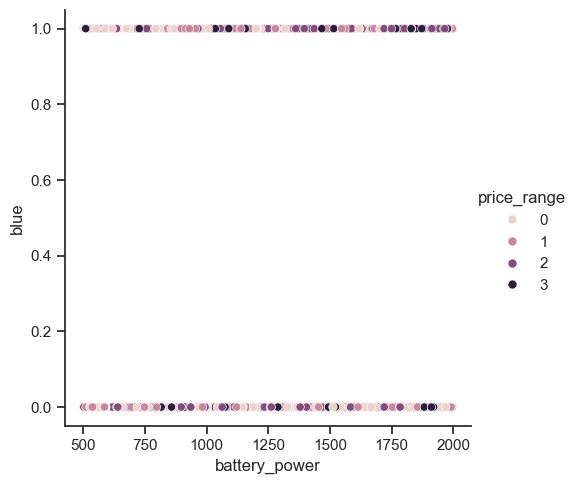

In [40]:
sns.relplot(x='battery_power',y='blue',hue='price_range',data=data)
plt.show()

##### Insights:-

 <img src="battery_power1.png" width="300">

* The mobile devices having battery power more than 1600 mAh and bluetooth have more chances of coming under 2nd & 3rd price range.

### Bivariate Analysis using Barplot

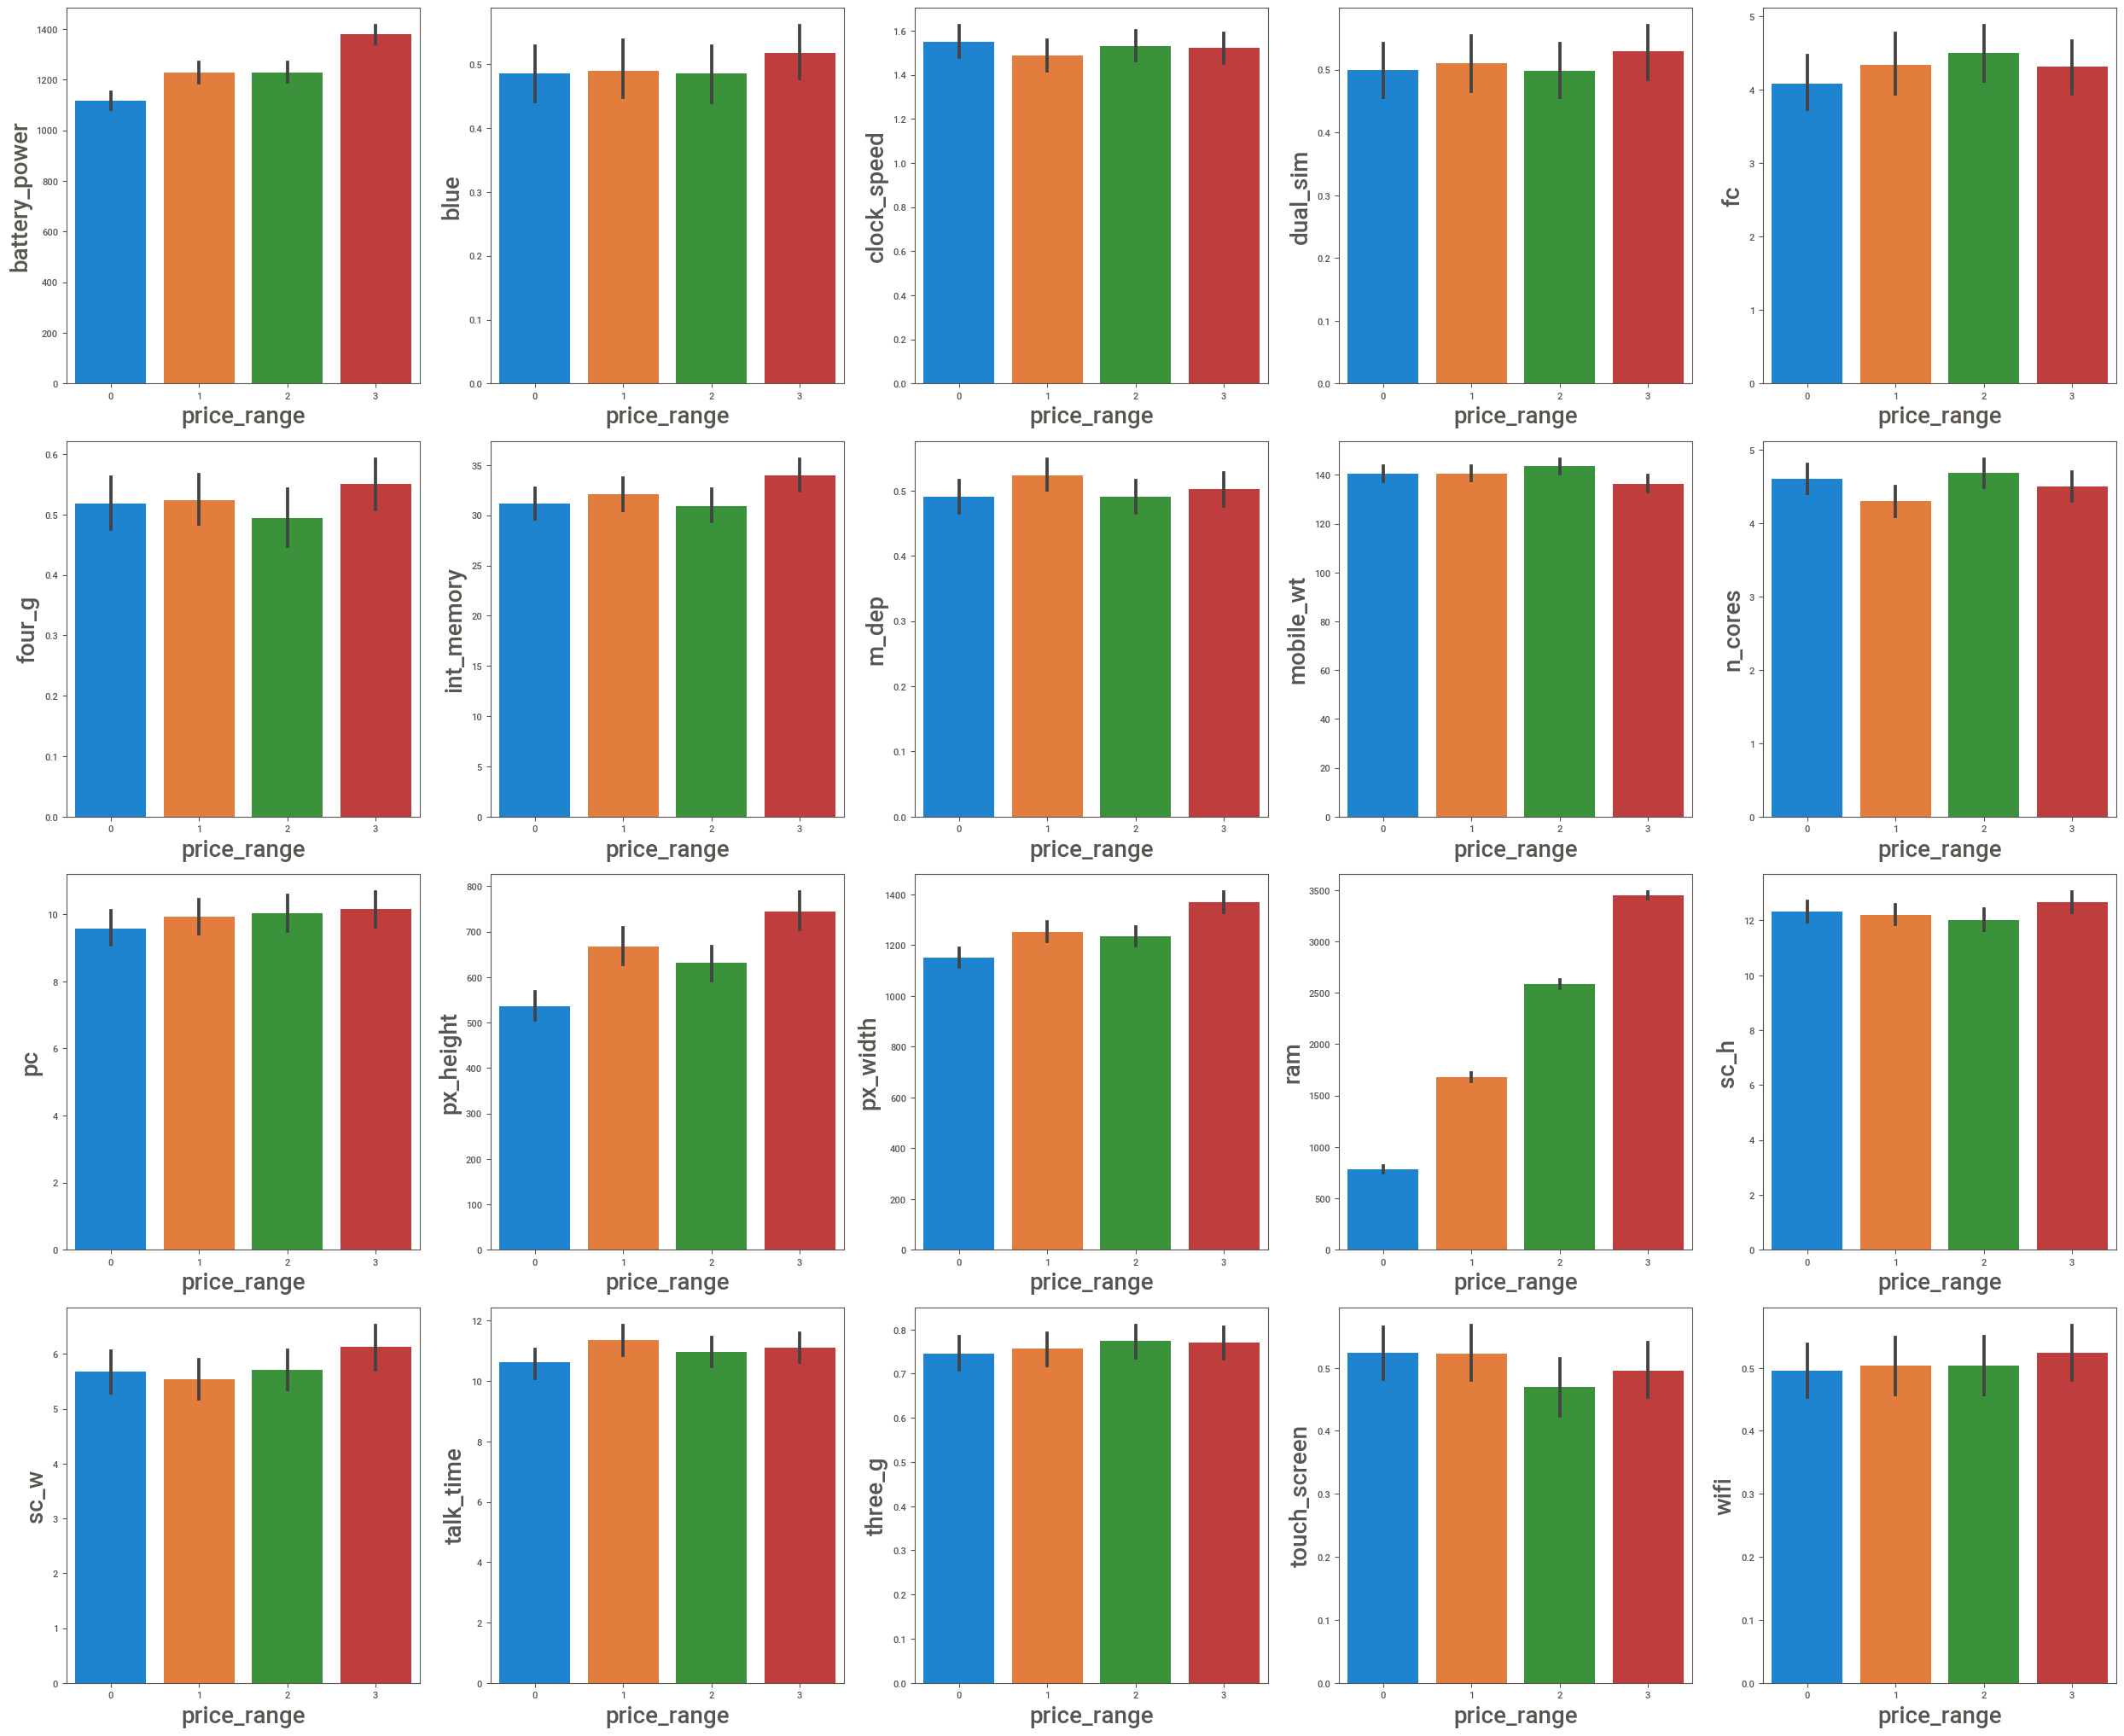

In [23]:
plt.figure(figsize=(25,25),facecolor='white')

plotnum=1

for c in data:
    if(plotnum<21):
        ax=plt.subplot(5,5,plotnum)
        sns.barplot(x=data.price_range,y=data[c])
        plt.xlabel('price_range',fontsize=20)
        plt.ylabel(c,fontsize=20)        
    plotnum+=1

plt.tight_layout() 

##### Insights:-
We can see in the above chart that there is increase in price range as the ram increases.
We can conclude :-
1)  Devices with higher RAM capacity often deliver better overall performance.

2) As applications and operating systems become more resource-demanding over time, having more RAM can help you ensure that the device remains capable of running the latest software smoothly for a longer period.

3) Higher RAM capacity often contributes to a higher manufacturing cost, which can result in a higher retail price for the device. 

### Bivariate analysis using Line plot (for clock speed)

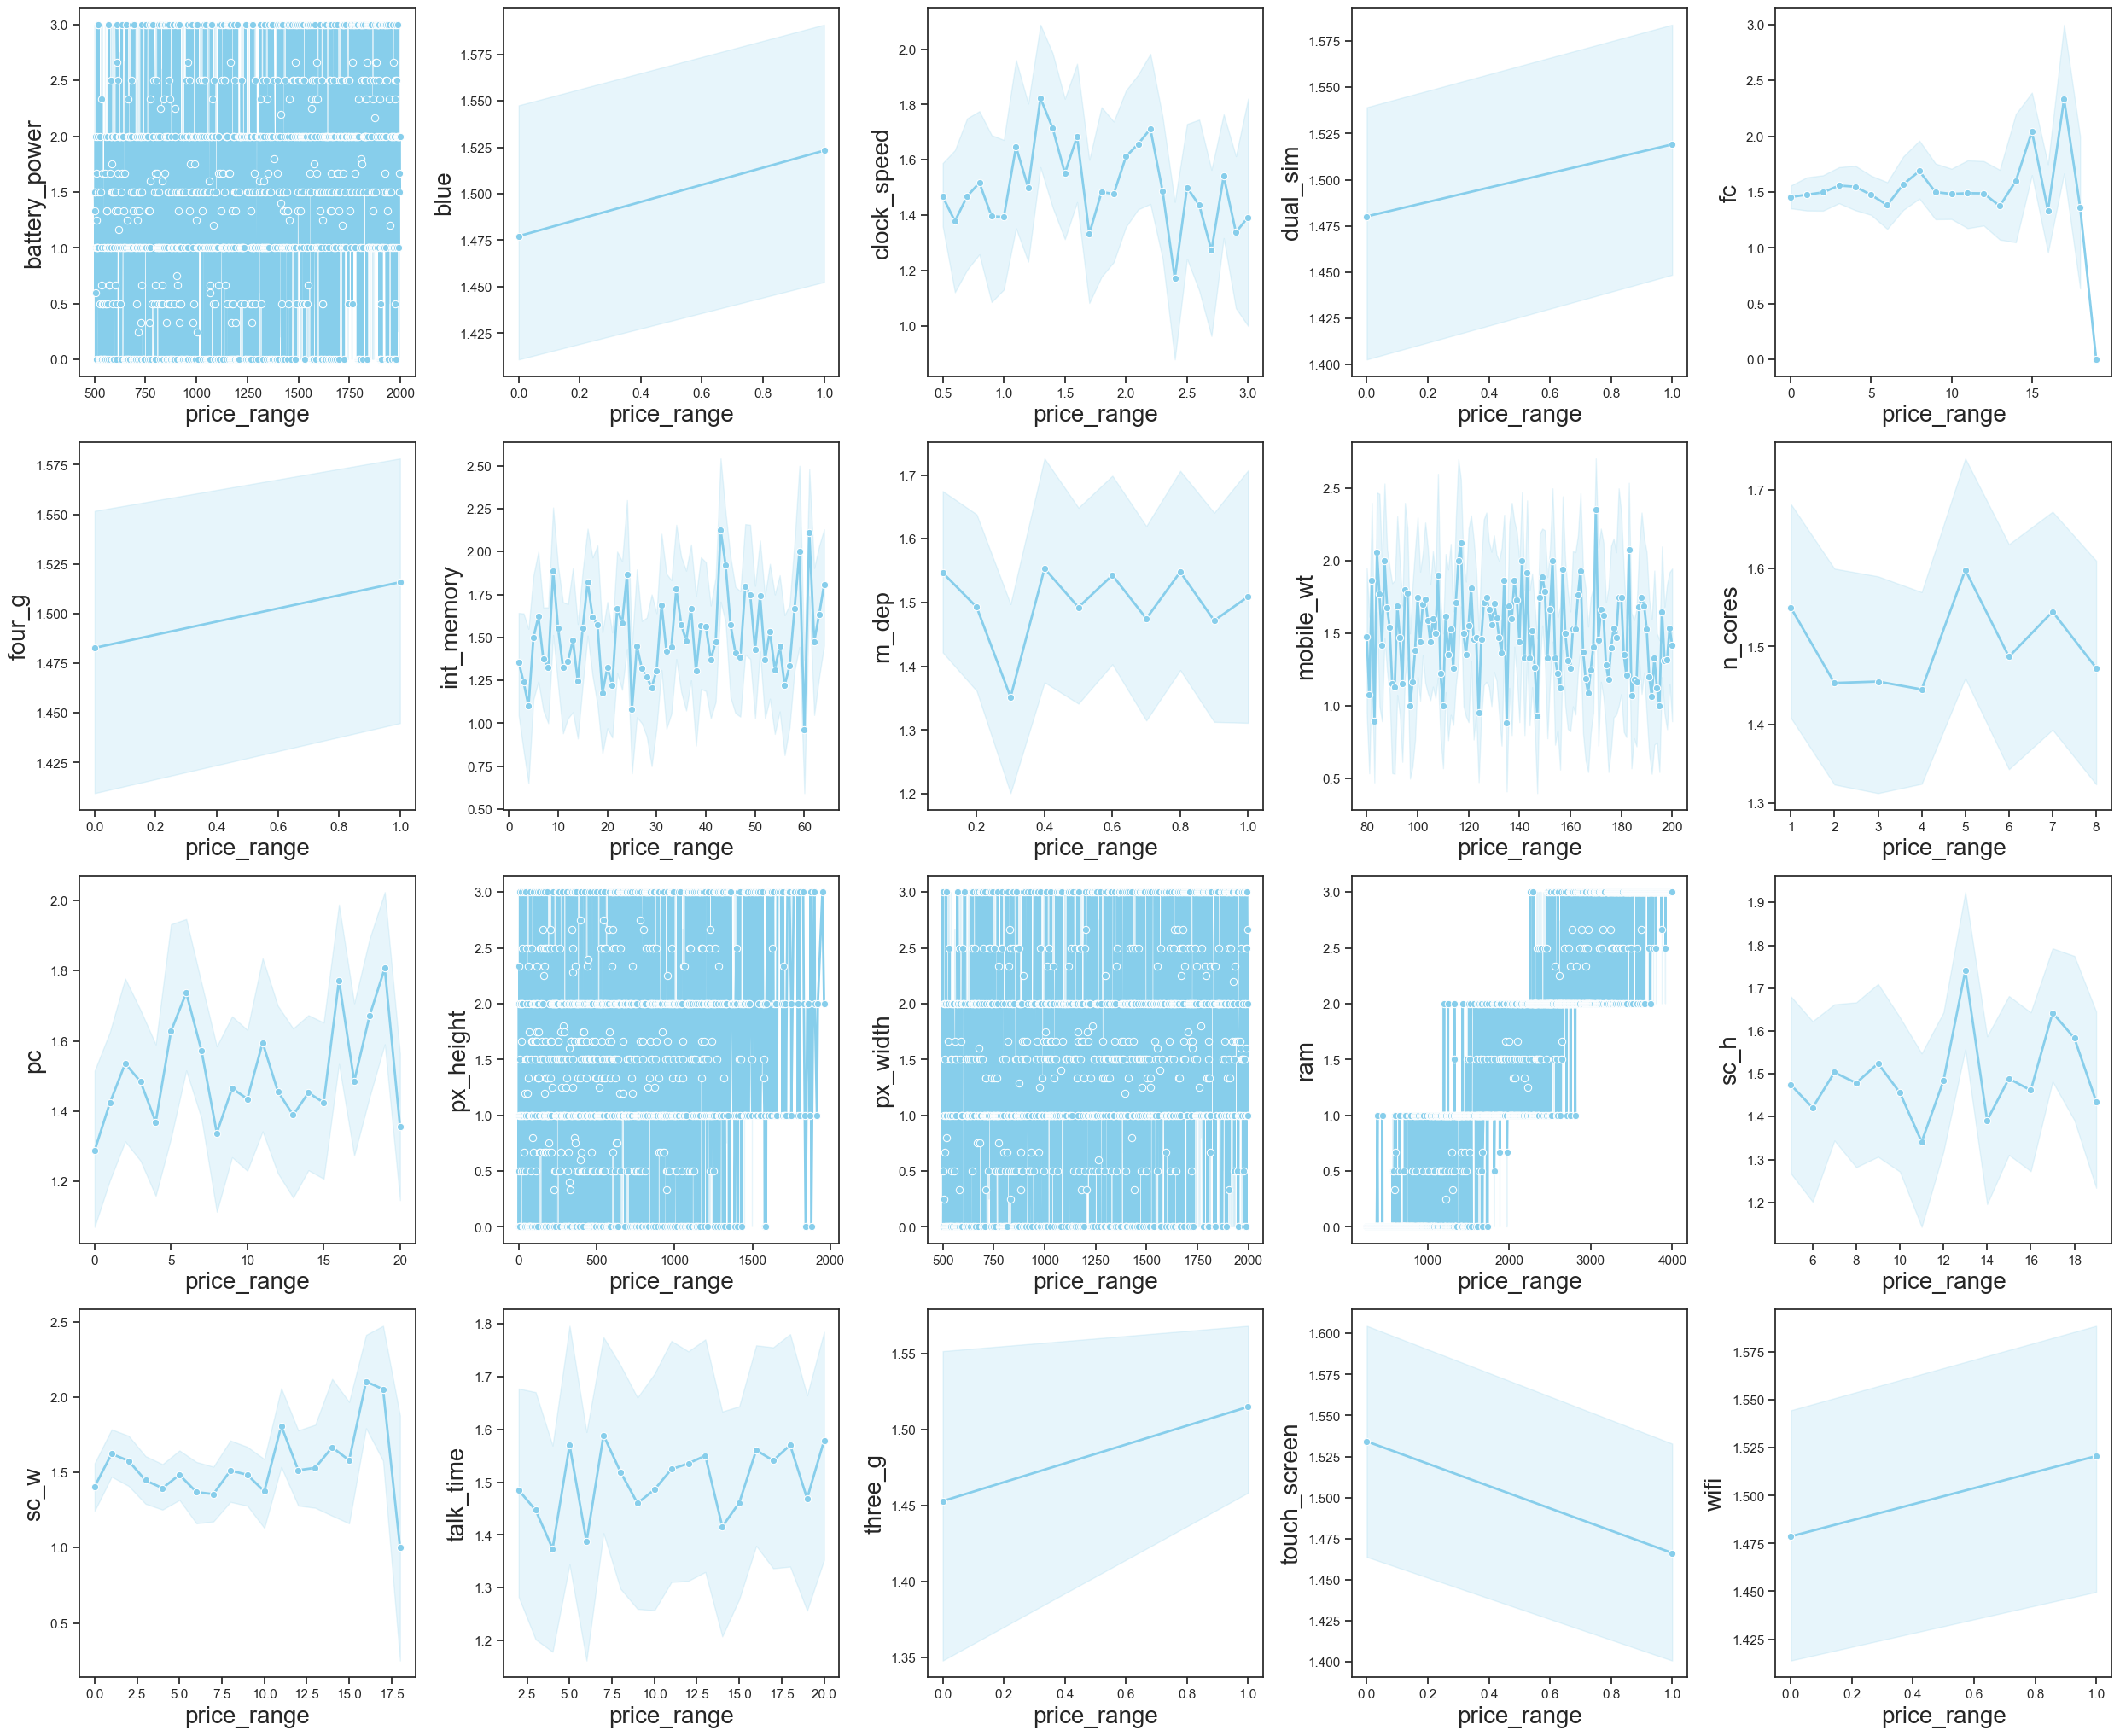

In [175]:
plt.figure(figsize=(25,25),facecolor='white')

plotnum=1

for c in data:
    if(plotnum<21):
        ax=plt.subplot(5,5,plotnum)
        sns.lineplot(x=data[c], y='price_range', data=data, color='skyblue', marker='o', linewidth=2)
        plt.xlabel('price_range',fontsize=20)
        plt.ylabel(c,fontsize=20)        
    plotnum+=1

plt.tight_layout() 

### Bivariate Analysis using Histplot

##### For bluetooth

<AxesSubplot:xlabel='price_range', ylabel='Count'>

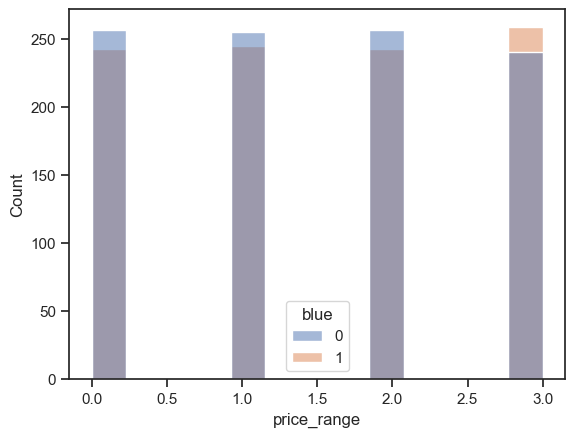

In [134]:
sns.histplot(x='price_range',hue='blue',data=data)



##### Insights:-

* In price range 3 there are more chances of having bluetooth than the other price range.

   <img src="bluetooth-logo.png" alt="Bluetooth Logo" width="30" align="left">   



##### For wifi

<AxesSubplot:xlabel='price_range', ylabel='Count'>

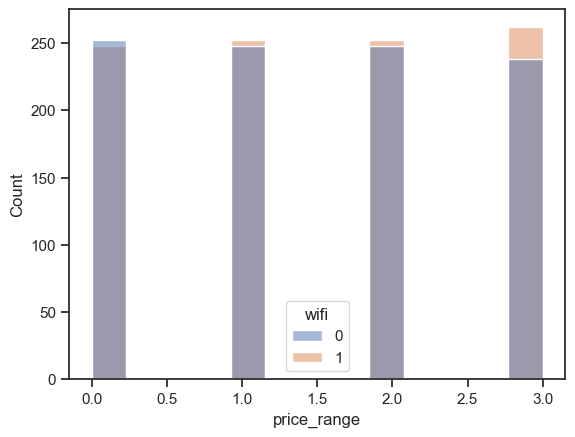

In [138]:
sns.histplot(x='price_range',hue='wifi',data=data)

##### Insights:-
* In price range 0 there are more chances of having wifi than not having compare to other price range.

##### For touch screen

<AxesSubplot:xlabel='price_range', ylabel='Count'>

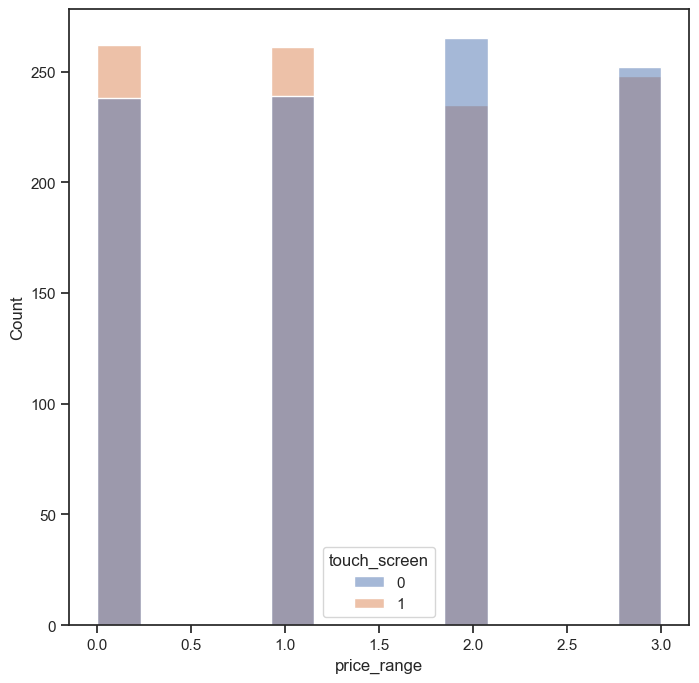

In [143]:
plt.figure(figsize=(8,8),facecolor='white')

sns.histplot(x='price_range',hue='touch_screen',data=data)

##### Insights:-
* In price range 2 there are more chances of having touch screen devices than not having compare to other price range.

##### For 4G

<AxesSubplot:xlabel='price_range', ylabel='Count'>

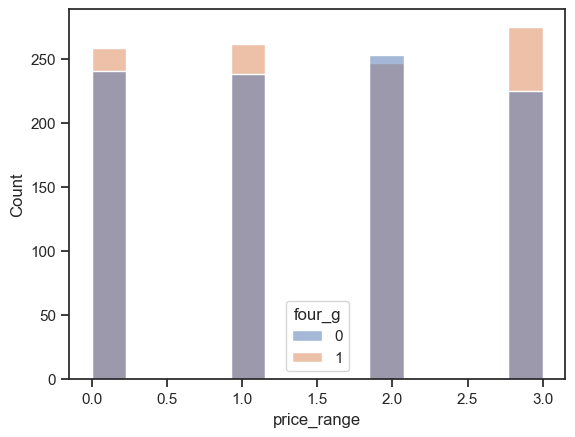

In [145]:
sns.histplot(x='price_range',hue='four_g',data=data)

##### Insights:-
* In price range 2 there are more chances of having 4G devices than not having compare to other price range.

# Data Preprocessing

## Finding outliers

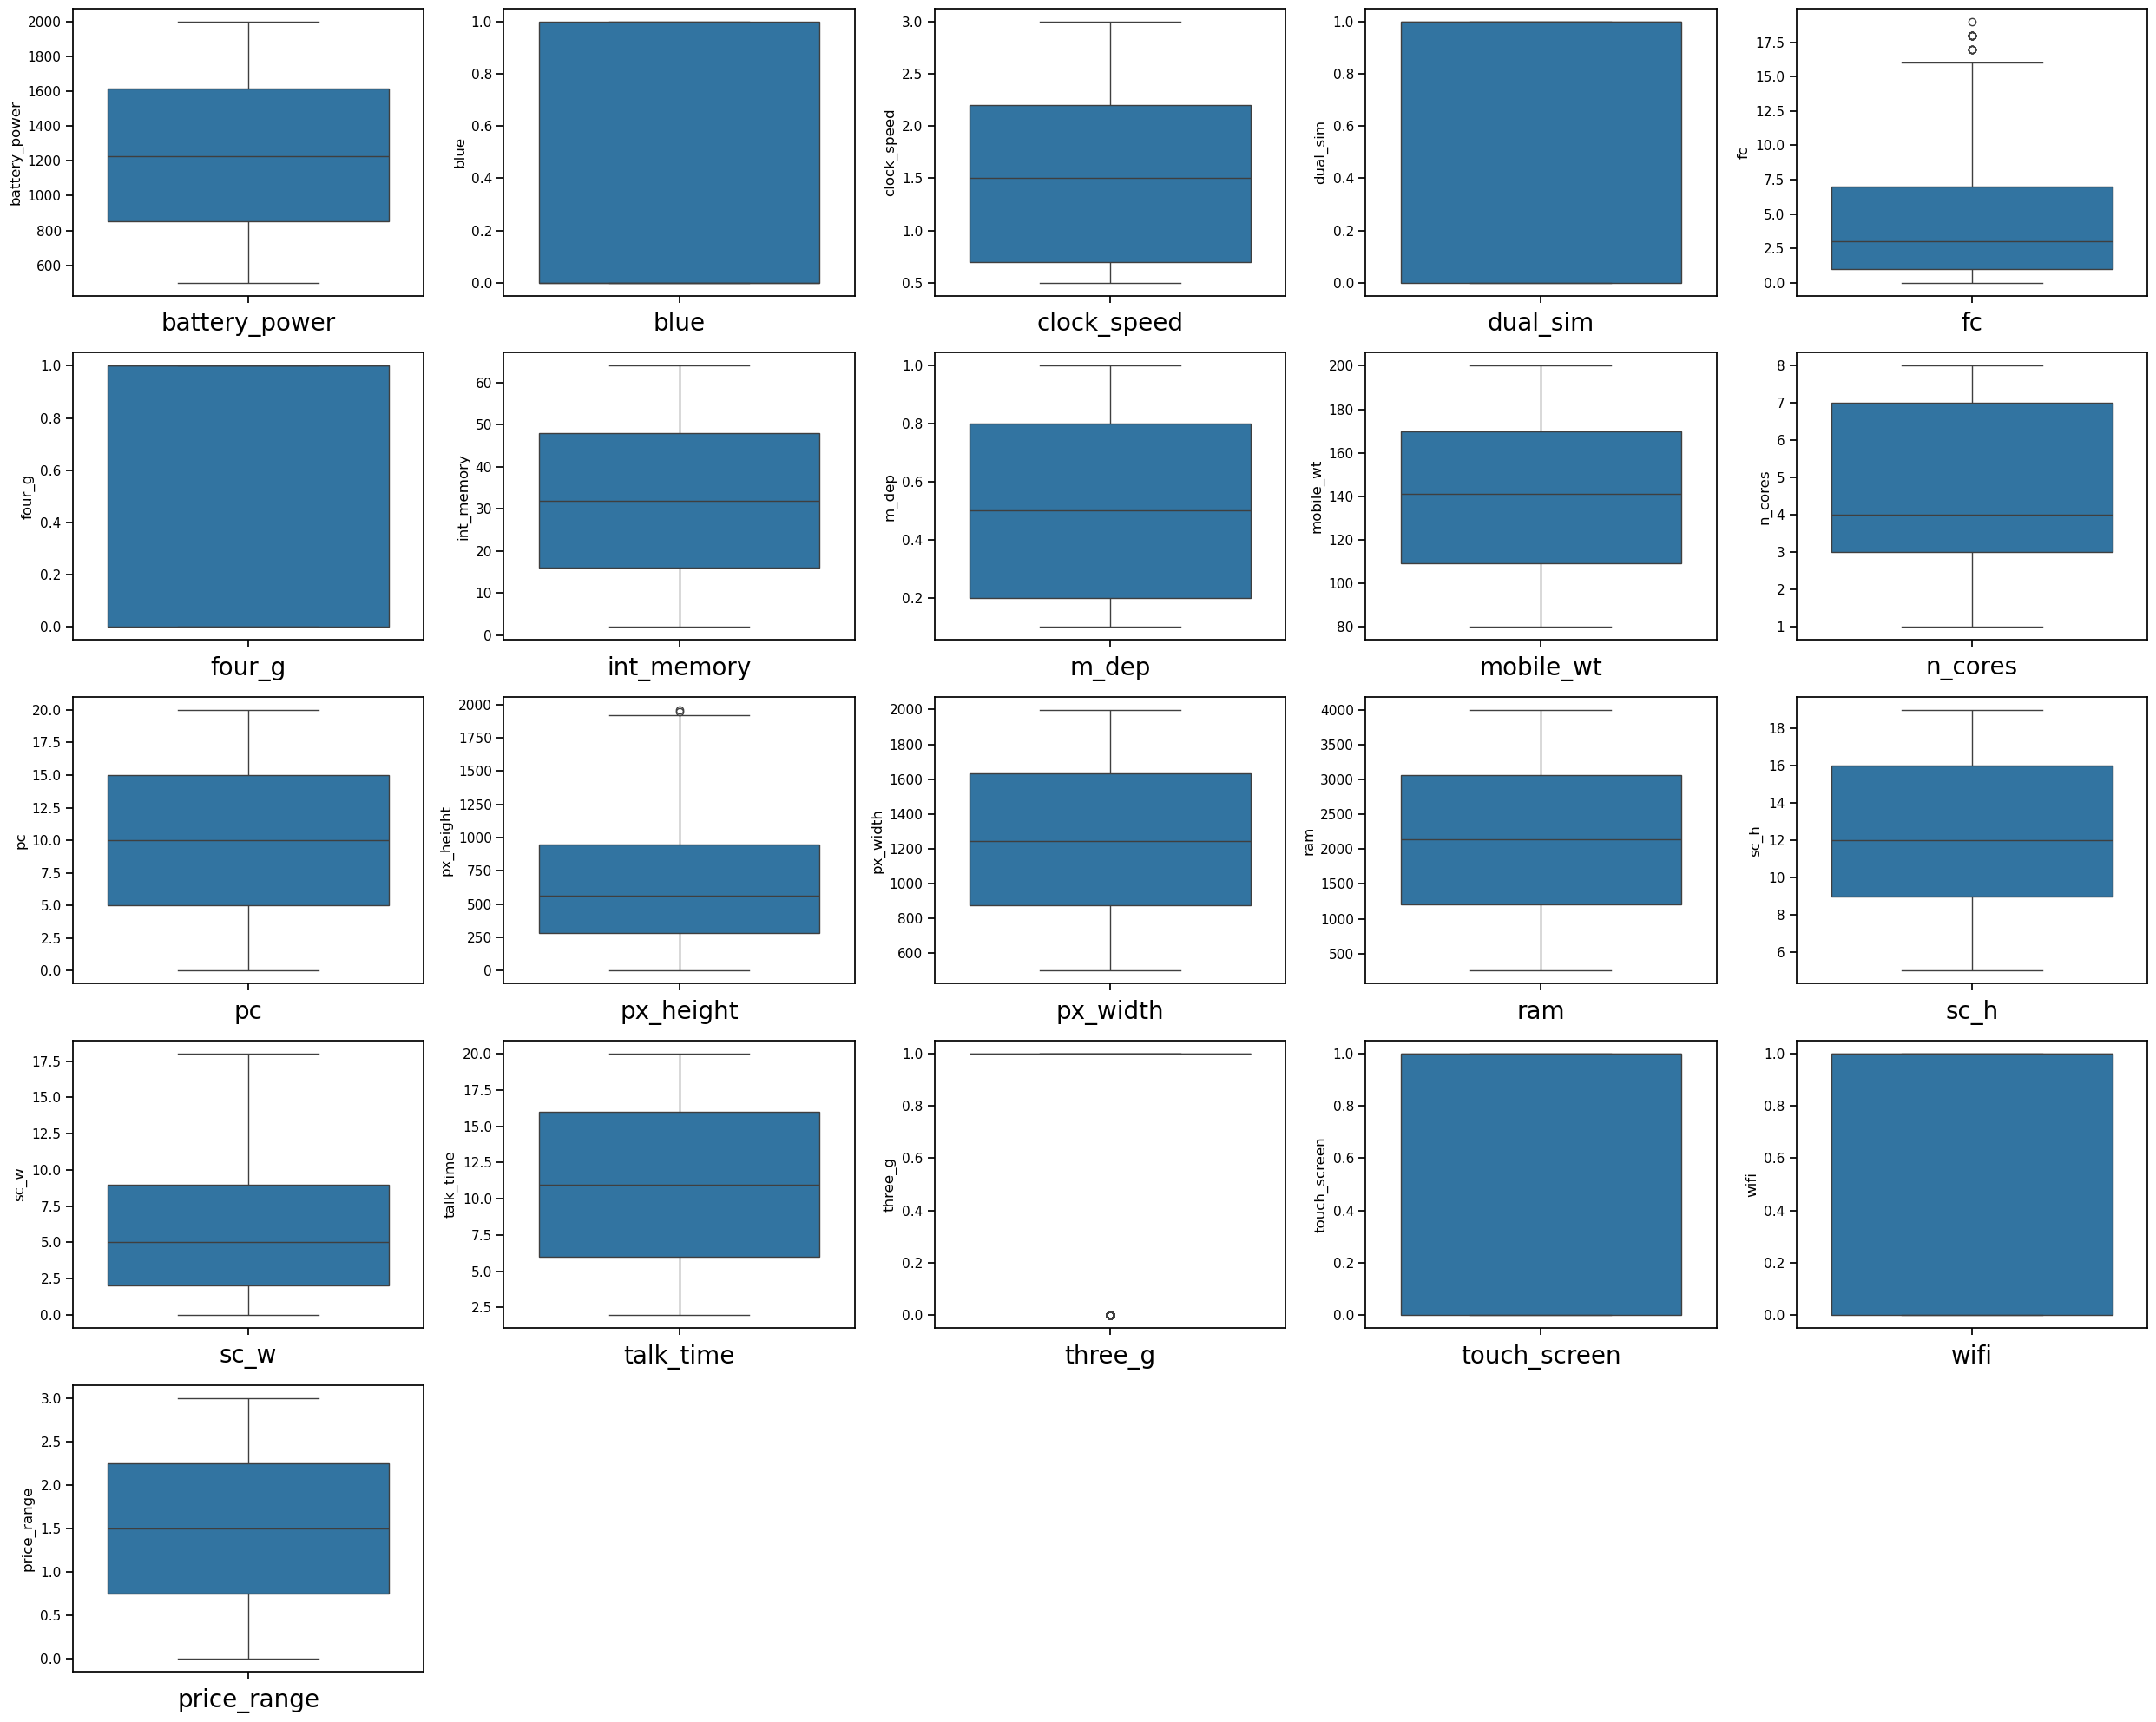

In [27]:
plt.figure(figsize=(25,20),facecolor='white')

plotnumber=1

for column in data:
    if plotnumber<=21 :
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

##### Insights:-
From the above figure we can see that there are outliers in two columns i.e. 
1) fc (total 18 outliers)

2) px_height (total 2 outliers)

So, we have to handle them.

## Handling outliers

In [28]:
from scipy import stats
IQR = stats.iqr(data.fc, interpolation = 'midpoint') 
IQR

## min and max limit calculation

# First quartile (Q1) 
Q1 = data.fc.quantile(0.25)

# Third quartile (Q3) 
Q3 =data.fc.quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

print('max_limit for px_height : ',max_limit)
print('min_limit for px_height : ',min_limit)

max_limit for px_height :  16.0
min_limit for px_height :  -8.0


In [29]:
data.loc[data['fc'] > max_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
95,1137,1,1.0,0,18,0,7,1.0,196,3,19,942,1179,3616,13,5,12,1,1,1,3
169,1569,0,2.8,1,17,0,44,0.3,110,4,20,45,1942,1260,9,2,17,1,0,0,1
226,1708,1,2.4,1,18,1,49,0.1,109,1,19,233,517,3388,6,4,16,1,1,1,3
229,1689,0,1.8,0,17,0,24,0.3,127,3,18,954,1200,2766,7,2,7,0,1,1,3
300,1937,1,1.7,0,17,0,58,0.6,189,1,19,1728,1767,3321,5,4,14,1,1,0,3
305,1348,0,2.0,0,18,0,52,0.3,98,3,20,1869,1942,955,18,11,7,1,1,1,1
372,1703,1,1.5,1,17,1,55,0.7,138,5,19,1411,1711,2993,5,1,20,1,1,1,3
584,946,1,2.6,1,17,0,5,0.1,166,3,20,1698,1771,3720,15,7,4,0,1,0,3
1387,1533,1,1.1,1,18,1,17,0.3,160,4,20,1054,1393,2520,8,2,11,1,0,1,2
1406,1731,1,2.3,1,18,0,60,0.5,171,4,20,142,1039,1220,9,3,20,0,1,0,1


In [30]:
data.loc[data['fc'] > max_limit,'fc']=np.median(data.fc)

In [31]:
data.loc[data['fc'] > max_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


<AxesSubplot:ylabel='fc'>

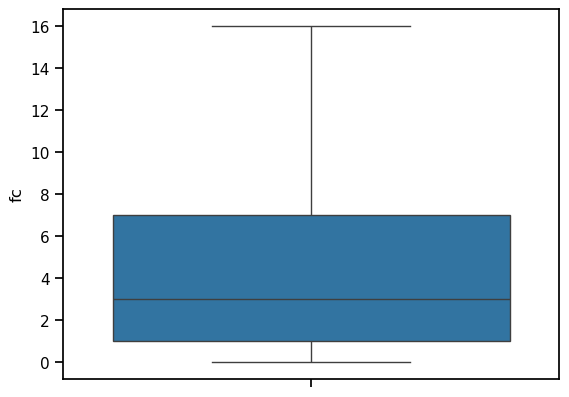

In [32]:
sns.boxplot(data['fc'])

##### Now there are no outliers in our 'fc' column

In [33]:
IQR = stats.iqr(data.px_height, interpolation = 'midpoint') 
IQR
Q1 = data.px_height.quantile(0.25)
Q3 =data.px_height.quantile(0.75)
min_limit=Q1 - 1.5*IQR
max_limit=Q3 +1.5*IQR
print('max_limit for px_height : ',max_limit)
print('min_limit for px_height : ',min_limit)

max_limit for px_height :  1944.75
min_limit for px_height :  -714.75


In [34]:
data.loc[data['px_height'] > max_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
988,1413,1,0.5,1,4,1,45,0.4,104,5,6,1949,1994,2973,17,8,15,1,0,1,3
1771,1230,1,1.6,0,0,1,48,0.7,111,7,2,1960,1963,1622,18,17,16,1,1,1,2


In [35]:
data.loc[data['px_height'] > max_limit,'px_height']=np.median(data.px_height)

In [36]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


<AxesSubplot:ylabel='px_height'>

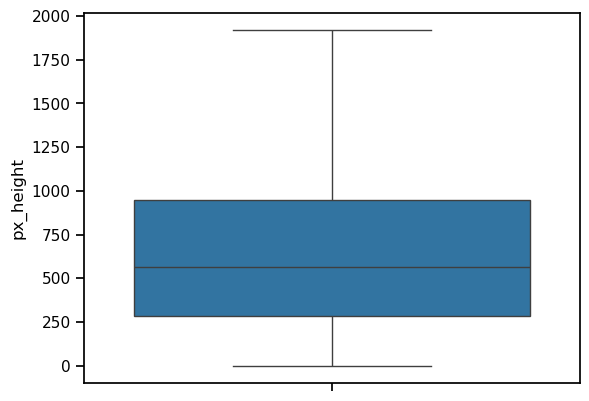

In [37]:
sns.boxplot(data['px_height'])

##### Now there are no outliers in our 'px_height' column.

## Scaling with MinMaxScaler

In [38]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df = data[['battery_power','clock_speed','fc','int_memory','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']]
scaled_data = sc.fit_transform(df)
scaled_data

array([[0.22778891, 0.68      , 0.0625    , ..., 0.28571429, 0.38888889,
        0.94444444],
       [0.34736139, 0.        , 0.        , ..., 0.85714286, 0.16666667,
        0.27777778],
       [0.04141617, 0.        , 0.125     , ..., 0.42857143, 0.11111111,
        0.38888889],
       ...,
       [0.94188377, 0.16      , 0.0625    , ..., 0.28571429, 0.05555556,
        0.16666667],
       [0.6753507 , 0.16      , 0.25      , ..., 0.92857143, 0.55555556,
        0.94444444],
       [0.00601202, 0.6       , 0.3125    , ..., 1.        , 0.22222222,
        0.        ]])

In [39]:
df2 = pd.DataFrame(scaled_data, columns=['battery_power','clock_speed','fc','int_memory','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time'])
df2

,battery_power,clock_speed,fc,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,0.227789,0.68,0.0625,0.080645,0.900000,0.142857,0.10,0.010417,0.170895,0.612774,0.285714,0.388889,0.944444
1,0.347361,0.00,0.0000,0.822581,0.466667,0.285714,0.30,0.471354,0.993324,0.634687,0.857143,0.166667,0.277778
2,0.041416,0.00,0.1250,0.629032,0.541667,0.571429,0.30,0.657813,0.811749,0.627205,0.428571,0.111111,0.388889
3,0.076152,0.80,0.0000,0.129032,0.425000,0.714286,0.45,0.633333,0.858478,0.671566,0.785714,0.444444,0.500000
4,0.881764,0.28,0.8125,0.677419,0.508333,0.142857,0.70,0.629167,0.475300,0.308658,0.214286,0.111111,0.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,0.00,0.0000,0.000000,0.216667,0.714286,0.70,0.636458,0.927904,0.110102,0.571429,0.222222,0.944444
1996,0.977956,0.84,0.0000,0.596774,0.891667,0.428571,0.15,0.476562,0.977971,0.474613,0.428571,0.555556,0.777778
1997,0.941884,0.16,0.0625,0.548387,0.233333,1.000000,0.15,0.452083,0.755674,0.748530,0.285714,0.055556,0.166667
1998,0.675351,0.16,0.2500,0.709677,0.541667,0.571429,0.25,0.175000,0.113485,0.163816,0.928571,0.555556,0.944444


In [40]:
final_data = pd.concat([df2,data[['m_dep','blue','dual_sim','four_g','three_g','touch_screen','wifi','price_range']]],axis=1)
final_data

,battery_power,clock_speed,fc,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,m_dep,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0.227789,0.68,0.0625,0.080645,0.900000,0.142857,0.10,0.010417,0.170895,0.612774,0.285714,0.388889,0.944444,0.6,0,0,0,0,0,1,1
1,0.347361,0.00,0.0000,0.822581,0.466667,0.285714,0.30,0.471354,0.993324,0.634687,0.857143,0.166667,0.277778,0.7,1,1,1,1,1,0,2
2,0.041416,0.00,0.1250,0.629032,0.541667,0.571429,0.30,0.657813,0.811749,0.627205,0.428571,0.111111,0.388889,0.9,1,1,1,1,1,0,2
3,0.076152,0.80,0.0000,0.129032,0.425000,0.714286,0.45,0.633333,0.858478,0.671566,0.785714,0.444444,0.500000,0.8,1,0,0,1,0,0,2
4,0.881764,0.28,0.8125,0.677419,0.508333,0.142857,0.70,0.629167,0.475300,0.308658,0.214286,0.111111,0.722222,0.6,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,0.00,0.0000,0.000000,0.216667,0.714286,0.70,0.636458,0.927904,0.110102,0.571429,0.222222,0.944444,0.8,1,1,1,1,1,0,0
1996,0.977956,0.84,0.0000,0.596774,0.891667,0.428571,0.15,0.476562,0.977971,0.474613,0.428571,0.555556,0.777778,0.2,1,1,0,1,1,1,2
1997,0.941884,0.16,0.0625,0.548387,0.233333,1.000000,0.15,0.452083,0.755674,0.748530,0.285714,0.055556,0.166667,0.7,0,1,1,1,1,0,3
1998,0.675351,0.16,0.2500,0.709677,0.541667,0.571429,0.25,0.175000,0.113485,0.163816,0.928571,0.555556,0.944444,0.1,0,0,1,1,1,1,0


# Feature Selection

In [41]:
heat = final_data[['battery_power','clock_speed','fc','int_memory','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','m_dep']]

## Heatmap

<AxesSubplot:>

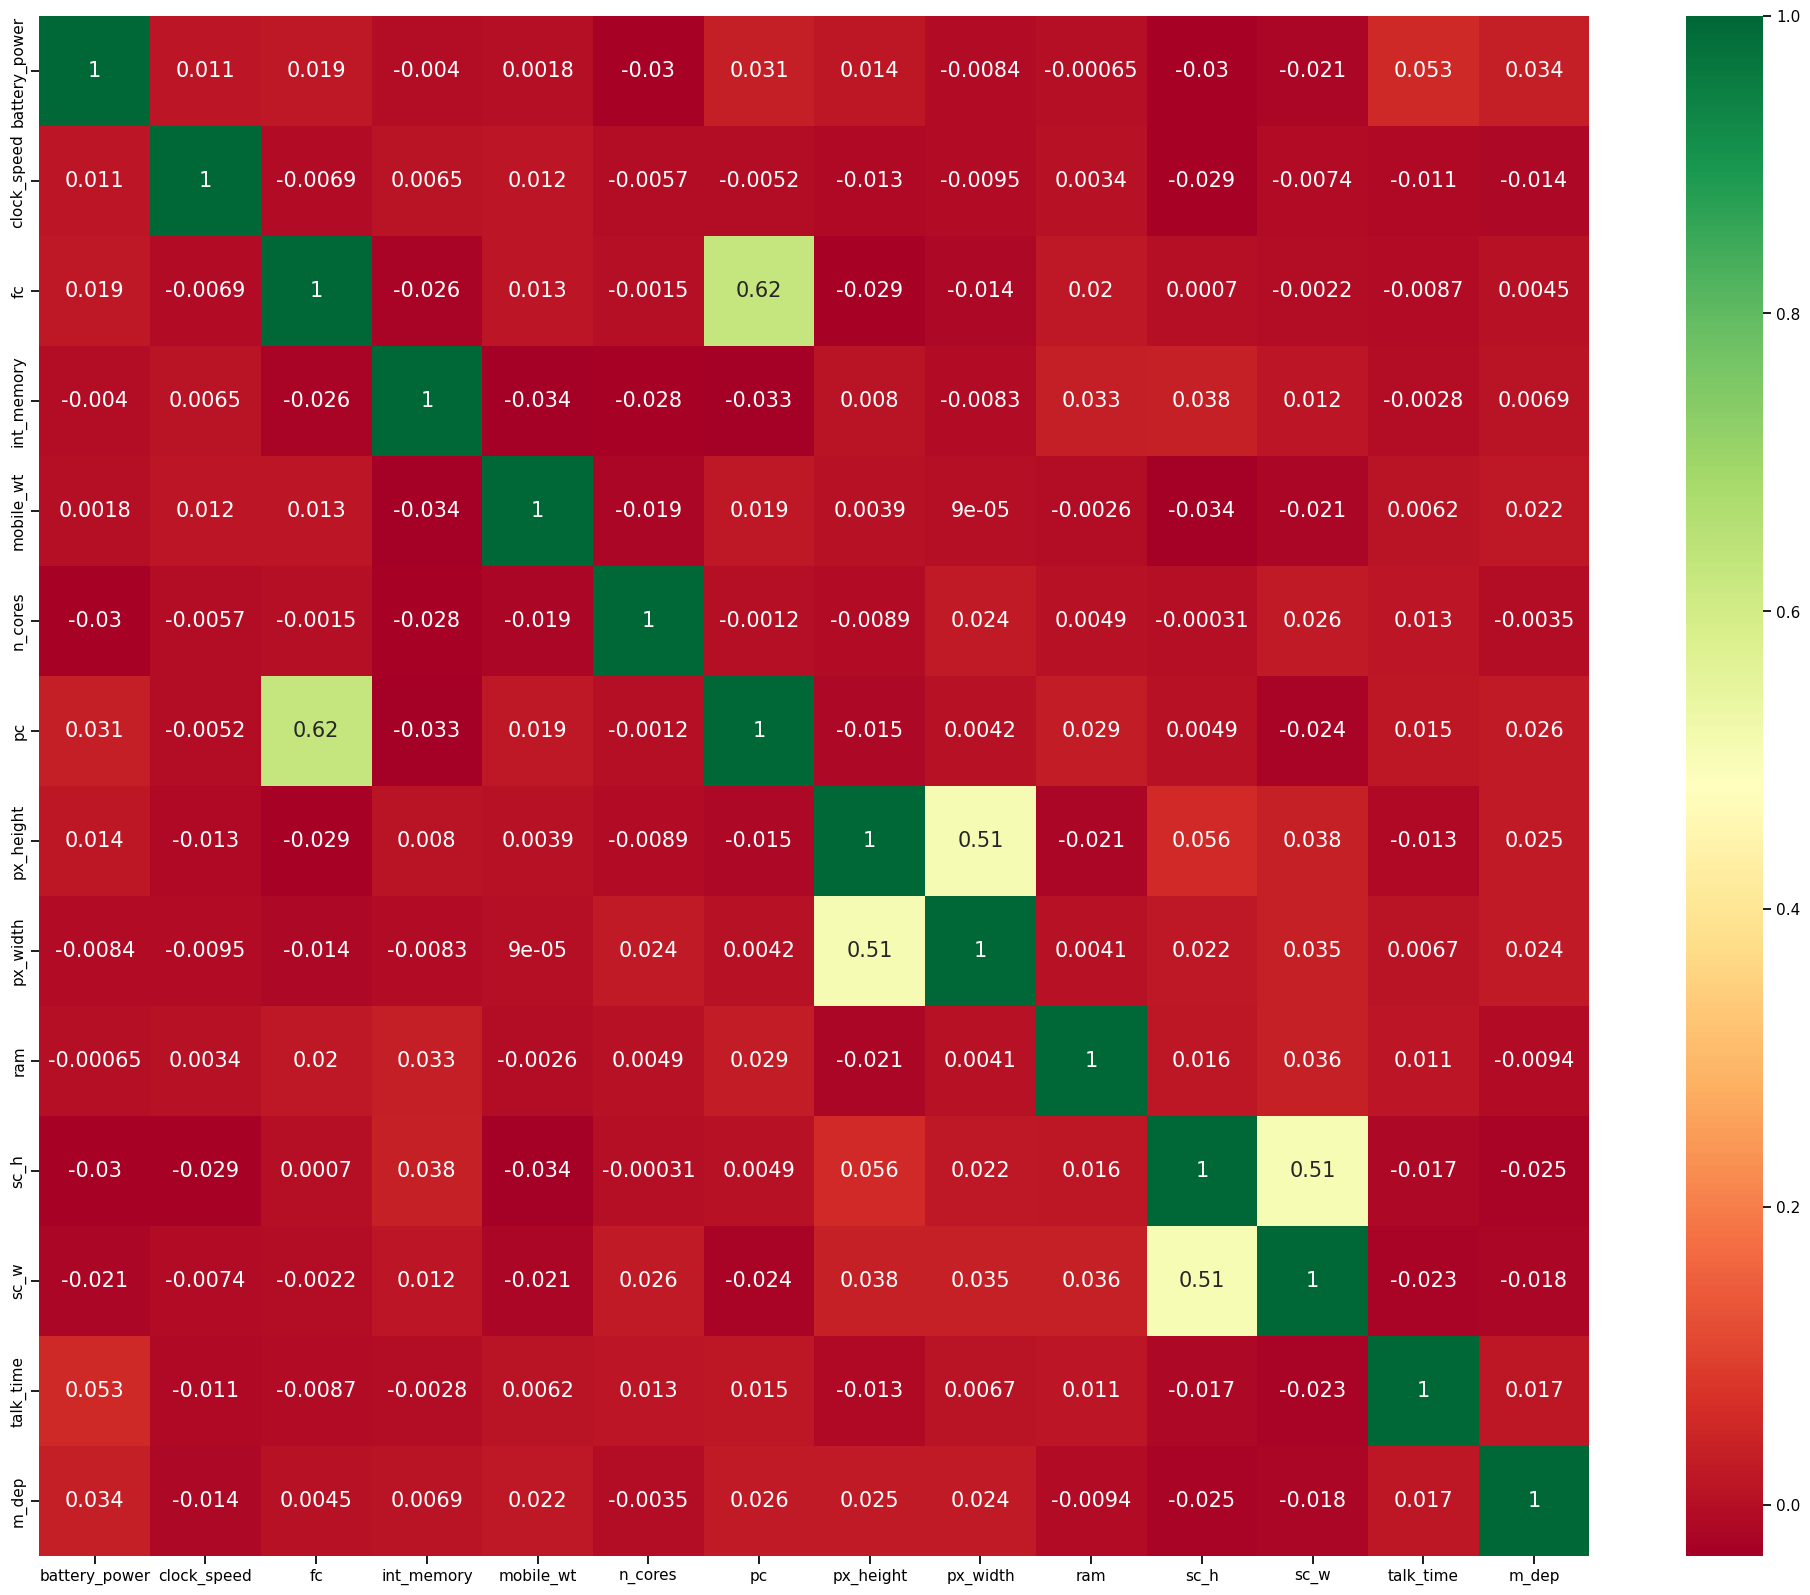

In [42]:
plt.figure(figsize=(25,20))
sns.heatmap(heat.corr(),annot=True,cmap="RdYlGn", annot_kws={"size":15})

##### Insights:-
* As we can see there is not much correlation between the any two columns, hence we cannot remove any column further.

# Task 1:-
## Data Analysis Report

The dataset is complete with no missing values. The maximum battery capacity is 1998 mAh, suitable for small devices. The highest front camera resolution is 19 megapixels. Bluetooth is present in 50% of devices. The maximum storage capacity provided is 64 GB. The heaviest mobile device weighs 200 grams. Eight processor cores is the highest configuration. The top RAM storage offered is 3998 megabytes. Approximately 76% of mobile phones support 3G. Sweetviz insights reveal patterns in clock speed, Bluetooth prevalence, dual SIM functionality, potential data corruption in front cameras, and common features like 4G, mobile depth, and WiFi. Additional observations highlight correlations between screen width and price range, RAM capacity and price range, as well as variations in feature prevalence across different price ranges, and the presence of outliers in columns fc and px_height.

# Model Creation

In [43]:
## Creating independent and dependent variable
X=final_data.iloc[:,:-1]
y=final_data.price_range
X

,battery_power,clock_speed,fc,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,m_dep,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,0.227789,0.68,0.0625,0.080645,0.900000,0.142857,0.10,0.010417,0.170895,0.612774,0.285714,0.388889,0.944444,0.6,0,0,0,0,0,1
1,0.347361,0.00,0.0000,0.822581,0.466667,0.285714,0.30,0.471354,0.993324,0.634687,0.857143,0.166667,0.277778,0.7,1,1,1,1,1,0
2,0.041416,0.00,0.1250,0.629032,0.541667,0.571429,0.30,0.657813,0.811749,0.627205,0.428571,0.111111,0.388889,0.9,1,1,1,1,1,0
3,0.076152,0.80,0.0000,0.129032,0.425000,0.714286,0.45,0.633333,0.858478,0.671566,0.785714,0.444444,0.500000,0.8,1,0,0,1,0,0
4,0.881764,0.28,0.8125,0.677419,0.508333,0.142857,0.70,0.629167,0.475300,0.308658,0.214286,0.111111,0.722222,0.6,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,0.00,0.0000,0.000000,0.216667,0.714286,0.70,0.636458,0.927904,0.110102,0.571429,0.222222,0.944444,0.8,1,1,1,1,1,0
1996,0.977956,0.84,0.0000,0.596774,0.891667,0.428571,0.15,0.476562,0.977971,0.474613,0.428571,0.555556,0.777778,0.2,1,1,0,1,1,1
1997,0.941884,0.16,0.0625,0.548387,0.233333,1.000000,0.15,0.452083,0.755674,0.748530,0.285714,0.055556,0.166667,0.7,0,1,1,1,1,0
1998,0.675351,0.16,0.2500,0.709677,0.541667,0.571429,0.25,0.175000,0.113485,0.163816,0.928571,0.555556,0.944444,0.1,0,0,1,1,1,1


## Train Test Split

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=45)

In [45]:
y_train.value_counts()

3    423
0    396
2    395
1    386
Name: price_range, dtype: int64

## Smoting Technique

In [46]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [47]:
y_train_smote.value_counts()

0    423
2    423
1    423
3    423
Name: price_range, dtype: int64

# Model Evaluation

## Logistic Regression Algorithm

In [51]:
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score,classification_report

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train_smote,y_train_smote)
LR_y_train_predict=LR.predict(X_test)
accuracy = accuracy_score(y_test,LR_y_train_predict)
print("Accuracy:",accuracy*100,"%")

classification = classification_report(y_test,LR_y_train_predict)
print("\n",classification)

Accuracy: 90.0 %

               precision    recall  f1-score   support

           0       0.92      0.98      0.95       104
           1       0.88      0.87      0.87       114
           2       0.89      0.83      0.86       105
           3       0.92      0.94      0.93        77

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



### Cross Validation on Logistic Regression

In [52]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation and compute accuracy scores
scores = cross_val_score(LR, X, y, cv=10, scoring='accuracy')

print("Cross Validation Score of Logistic Regression:", scores.mean())
print("Std:", scores.std())


Cross Validation Score of Logistic Regression: 0.9245000000000001
Std: 0.01213466109951159


## OneVsRest Classifier Algorithm

In [53]:

from sklearn.multiclass import OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(LR)
ovr_classifier.fit(X_train_smote, y_train_smote)
y_pred = ovr_classifier.predict(X_test)
accuracy = accuracy_score(y_pred,y_test)
print("Accuracy:",accuracy*100,"%")

classification = classification_report(y_test, y_pred)
print("\n",classification)

Accuracy: 77.0 %

               precision    recall  f1-score   support

           0       0.84      1.00      0.91       104
           1       0.76      0.58      0.66       114
           2       0.67      0.61      0.64       105
           3       0.79      0.96      0.87        77

    accuracy                           0.77       400
   macro avg       0.76      0.79      0.77       400
weighted avg       0.76      0.77      0.76       400



### Cross Validation on OneVsRest Classifier

In [54]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation and compute accuracy scores
scores = cross_val_score(ovr_classifier, X, y, cv=10, scoring='accuracy')

print("Cross Validation Score of Logistic Regression:", scores.mean())
print("Std:", scores.std())

Cross Validation Score of Logistic Regression: 0.8055
Std: 0.015074813431681305


## SVM (Support Vector Machine) Algorithm

In [73]:
# Support Vector Machine

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_smote, y_train_smote)
y_hat = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_hat)
print("Accuracy:",accuracy*100,"%")

classification = classification_report(y_test, y_hat)
print("\n",classification)

Accuracy: 85.75 %

               precision    recall  f1-score   support

           0       0.93      0.96      0.94       104
           1       0.86      0.82      0.84       114
           2       0.77      0.81      0.79       105
           3       0.88      0.84      0.86        77

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



### Cross Validation on SVC

In [82]:
# Perform cross-validation and compute accuracy scores
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')

print("Cross Validation Score of SVC:", scores.mean())
print("Std:", scores.std())


Cross Validation Score of SVC: 0.8640000000000001
Std: 0.027459060435491987


## KNN (K-Nearest Neighbor) Algorithm

In [100]:
# Knn 

import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
error_rate =[]
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_smote, y_train_smote)
    y_new = knn.predict(X_test)
    error_rate.append(np.mean(y_new != y_test))
    
plt.figure(figsize=(8,4))
plt.plot(range(1,11),error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

knn1 = KNeighborsClassifier(n_neighbors=6)
knn1.fit(X_train_smote, y_train_smote)
y_new = knn1.predict(X_test)
accuracy = accuracy_score(y_test, y_new)
print("Accuracy:",accuracy*100,"%")

classification = classification_report(y_test, y_new)
print("\n",classification)

Accuracy: 42.5 %

               precision    recall  f1-score   support

           0       0.49      0.68      0.57       104
           1       0.30      0.34      0.32       114
           2       0.35      0.29      0.32       105
           3       0.71      0.39      0.50        77

    accuracy                           0.42       400
   macro avg       0.47      0.43      0.43       400
weighted avg       0.44      0.42      0.42       400



### Cross Validation on KNN

In [83]:
# Perform cross-validation and compute accuracy scores
scores = cross_val_score(knn1, X, y, cv=10, scoring='accuracy')

# Print the results
print("Cross Validation Score of KNN:", scores.mean())
print("Std:", scores.std())


Cross Validation Score of KNN: 0.4
Std: 0.025980762113533163


## Decision tree Classifier Algorithm

In [101]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier() 
dt.fit(X_train_smote, y_train_smote)
y_hat=dt.predict(X_test)
accuracy = accuracy_score(y_test, y_hat)
print("Accuracy:",accuracy*100,"%")

classification = classification_report(y_test, y_hat)
print("\n",classification)

Accuracy: 82.0 %

               precision    recall  f1-score   support

           0       0.85      0.89      0.87       104
           1       0.80      0.75      0.77       114
           2       0.78      0.79      0.78       105
           3       0.87      0.86      0.86        77

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



### Cross Validation on Decision Tree Classifier

In [84]:
# Perform cross-validation and compute accuracy scores
scores = cross_val_score(dt, X, y, cv=10, scoring='accuracy')

# Print the results
print("Cross Validation Score of Decision Tree Classifier:", scores.mean())
print("Std:", scores.std())


Cross Validation Score of Decision Tree Classifier: 0.8375
Std: 0.023796008068581582


### Grid Search CV on Decision Tree (Hyperparameter Tuning)


In [88]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['gini', 'entropy'], 
    'splitter': ['best', 'random'],  
    'max_depth': [None, 5, 10, 15],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4] 
}

tree_clf = DecisionTreeClassifier(random_state=3)

tree_cv = GridSearchCV(estimator=tree_clf, param_grid=params, cv=5)

tree_cv.fit(X_train_smote,y_train_smote)

best_params = tree_cv.best_params_ 

print(f"Best paramters: {best_params})")

Best paramters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'})


### Decision Tree regressor with best hyperparameter

In [89]:
dt1=DecisionTreeClassifier(criterion= 'entropy', max_depth= None, min_samples_leaf= 1, min_samples_split= 5, splitter= 'best')
dt1.fit(X_train,y_train)
y_hat1=dt1.predict(X_test)
acc2=accuracy_score(y_test,y_hat1)
print("Accuracy:",acc2*100,"%")

Accuracy: 84.25 %


## Random Forest Classifier Algorithm

In [102]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest

rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train_smote,y_train_smote)
y_predict=rf_clf.predict(X_test)
acc2=accuracy_score(y_test,y_predict)
print("Accuracy:",acc2*100,"%")

classification = classification_report(y_test, y_predict)
print("\n",classification)

Accuracy: 88.5 %

               precision    recall  f1-score   support

           0       0.90      0.97      0.94       104
           1       0.87      0.82      0.84       114
           2       0.84      0.86      0.85       105
           3       0.95      0.91      0.93        77

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.88       400



### Cross Validation on Random Forest

In [85]:
# Perform cross-validation and compute accuracy scores
scores = cross_val_score(rf_clf, X, y, cv=10, scoring='accuracy')

# Print the results
print("Cross Validation Score of Random Forest:", scores.mean())
print("Std:", scores.std())


Cross Validation Score of Random Forest: 0.881
Std: 0.024979991993593614


### Randomized Search CV with Random Forest (Hyperparameter Tuning)

In [90]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=1, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_##it will give you best parameters 
print(f"Best params: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best params: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True})


### Random Forest with best hyperparameter

In [91]:
rf_clf2 = RandomForestClassifier(n_estimators= 400, min_samples_split= 5, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 30, bootstrap= True) #passing best parameter to randomforest
rf_clf2.fit(X_train_smote, y_train_smote) #training 
y_predict=rf_clf2.predict(X_test) #testing
acc=accuracy_score(y_test,y_predict)
print("Accuracy:",acc*100,"%")

Accuracy: 89.5 %


## Gradient Boosting Algorithm

In [103]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier() ## object creation
gbm.fit(X_train_smote,y_train_smote) ## fitting the data
y_gbm=gbm.predict(X_test)
accu_scor=accuracy_score(y_test,y_gbm)
print("Accuracy:",accu_scor*100,"%")

classification = classification_report(y_test, y_gbm)
print("\n",classification)

Accuracy: 91.0 %

               precision    recall  f1-score   support

           0       0.94      0.98      0.96       104
           1       0.90      0.86      0.88       114
           2       0.88      0.87      0.87       105
           3       0.94      0.95      0.94        77

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



### Cross Validation on Gradient Boosting

In [86]:
# Perform cross-validation and compute accuracy scores
scores = cross_val_score(gbm, X, y, cv=10, scoring='accuracy')

# Print the results
print("Cross Validation Score of Gradient Boosting:", scores.mean())
print("Std:", scores.std())


Cross Validation Score of Gradient Boosting: 0.9095000000000001
Std: 0.018227726133558202


## XGBoost Algorithm

In [48]:
from xgboost import XGBClassifier#importing the model library
xgb_r=XGBClassifier() ## object creation
xgb_r.fit(X_train_smote,y_train_smote)# fitting the data
y_hat=xgb_r.predict(X_test)
accu_scor=accuracy_score(y_test,y_hat)
print("Accuracy:",accu_scor*100,"%")

classification = classification_report(y_test, y_hat)
print("\n",classification)

Accuracy: 91.25 %

               precision    recall  f1-score   support

           0       0.93      0.97      0.95       104
           1       0.91      0.84      0.87       114
           2       0.86      0.91      0.89       105
           3       0.97      0.94      0.95        77

    accuracy                           0.91       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.91      0.91      0.91       400



### Cross Validation on XgBoost

In [87]:
# Perform cross-validation and compute accuracy scores
scores = cross_val_score(xgb_r, X, y, cv=10, scoring='accuracy')

# Print the results
print("Cross Validation Score of XgBoost:", scores.mean())
print("Std:", scores.std())


Cross Validation Score of XgBoost: 0.9190000000000002
Std: 0.015779733838059487


### Randomized Search CV with XGBoost (Hyperparameter Tuning)

In [96]:


from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBClassifier(random_state=42,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
                        
rcv.fit(X_train, y_train)
cv_best_params = rcv.best_params_
print(f"Best paramters: {cv_best_params})")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 1.6, 'reg_alpha': 12.8, 'n_estimators': 50, 'max_depth': 8, 'learning_rate': 0.6, 'gamma': 0})
Time taken: 4.578700304031372 seconds


### XGBoost with best hyperparameter

In [49]:
XGB2 = XGBClassifier(reg_lambda=1.6, reg_alpha=12.8, n_estimators=50, max_depth=8, learning_rate=0.6, gamma=0)
XGB2.fit(X_train, y_train)  # Training
y_predict = XGB2.predict(X_test)  # Testing
acc = accuracy_score(y_test,y_predict) 
print("Accuracy:",acc*100,"%")

Accuracy: 88.25 %


## ANN (Artificial Neural Network)

In [44]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier( hidden_layer_sizes=(50,3),
                       learning_rate_init=0.1,
                       max_iter=100,
                       random_state=2)
model.fit(X_train_smote,y_train_smote) 
y_predict = model.predict(X_test)
print("Accuracy :",accuracy_score(y_test,y_predict)*100,"%")

classification = classification_report(y_test, y_predict)
print("\n",classification)

Accuracy : 19.25 %

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       104
           1       0.00      0.00      0.00       114
           2       0.00      0.00      0.00       105
           3       0.19      1.00      0.32        77

    accuracy                           0.19       400
   macro avg       0.05      0.25      0.08       400
weighted avg       0.04      0.19      0.06       400



### Grid Search on ANN (Hyperparameter Tuning)

In [98]:
import time
start_time = time.time()

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
}

# Create an ANN classifier
mlp = MLPClassifier(max_iter=1000)

# Perform GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=5)
grid_search.fit(X, y)

# Print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)


end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time taken: {elapsed_time} seconds")


Best Hyperparameters:  {'activation': 'tanh', 'hidden_layer_sizes': (100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
Best Accuracy Score:  0.968
Time taken: 1614.0891530513763 seconds


### ANN with best hyperparameter

In [48]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Instantiate MLPClassifier with specified hyperparameters
ANN1 = MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 50), learning_rate='adaptive', solver='adam')

# Training
ANN1.fit(X_train, y_train)

# Testing
y_predict = ANN1.predict(X_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_predict)
print("Accuracy:", acc * 100, "%")


Accuracy: 97.75 %


# Model Comparison Report

* Logistic Regression :- 90.00 %
* Cross validation on logistic regression :- 92.45 %


* OneVsRest Classifier :- 77.00 %
* Cross validation on OneVsRest :- 80.55 %


* Support Vector Machine :- 85.75 %
* Cross validation on SVM :- 86.40 %


* K-Nearest Neighbor :- 42.50 %
* Cross validation on KNN :- 40.00 %


* Decision Tree Classifier :- 82.00 %
* Cross validation on Decision Tree Classifier :- 83.75 %
* Decision Tree with best hyperparameter :- 84.25 %


* Random Forest Classifier :- 88.50 %
* Cross validation on Random Forest Classifier :- 88.10 %
* Random Forest with best hyperparameter :- 89.50 %


* Gradient Boosting :- 91.00 %
* Cross validation on Gradient Boosting :- 90.95 %


* XGBoost :- 91.25 %
* Cross validation on XGBoost :- 91.90 %
* XGBoost with best hyperparameter :- 88.25 %


* Artificial Neural Network :- 19.25 %
* ANN with best hyperparameter :- 97.75 %


##### The best accuracy is given by the ANN (Artificial Neural Network) with best hyperparameter i.e. 97.75 %

# Task 2:-
### On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth and Ram we will predict the price range of the mobile device.

In [55]:
# Use the provided mean values for other features as defaults
default_values = [1238.518500, np.random.randint(2), 1.522250, np.random.randint(2), 4.309500, 
                  np.random.randint(2), 32.046500, 0.4, 140.249000, 4.520500, 9.916500, 645.108000, 
                  1251.515500, 2124.213000, 12.306500, 5.767000, 11.011000, np.random.randint(2), 
                  np.random.randint(2), np.random.randint(2)]

# User input for battery power, 3G, wifi, Bluetooth, and RAM
a = int(input("Enter Battery Power: "))
b = int(input("Enter 3G present or not (0 or 1): "))
c = int(input("Enter wifi present or not (0 or 1): "))
d = int(input("Enter bluetooth present or not (0 or 1): "))
e = int(input("Enter RAM: "))

# Create an array with default values
input_features = np.array(default_values)

# Replace the corresponding elements with user input values
input_features[0] = a  # Battery Power
input_features[17] = b  # 3G
input_features[18] = c  # Wifi
input_features[1] = d  # Bluetooth
input_features[13] = e  # RAM

# Reshape the input for prediction
input_features = np.array([input_features])

# Predict the price range using the ANN model
predict = ANN1.predict(input_features)

print("Your price range of the mobile device is:", predict[0])


Enter Battery Power: 800
Enter 3G present or not (0 or 1): 1
Enter wifi present or not (0 or 1): 1
Enter bluetooth present or not (0 or 1): 1
Enter RAM: 2500
Your price range of the mobile device is: 3


# Task 3:-
## Business Analysis Report

* The business report suggests that the mobile device's business output is positively influenced by features such as ram, battery_power, px_height, and px_width. These features contribute significantly to increased business performance. 

* Conversely, features like mobile_wt, n_cores, talk_time, and m_dep have a negative impact on business output. 

* It is recommended to focus on enhancing and promoting devices with higher RAM capacity, battery power, and display resolution, while considering ways to optimize weight, core count, and talk time for improved market competitiveness. 

* Additionally, attention should be given to features like blue and wifi, which have statistically significant negative coefficients, indicating potential areas for improvement in consumer preferences and device connectivity.

# Challenges Faced

* The unit of weight of mobile device was not given, hence I considered it as in g (gram)

# Conclusion

* The analysis of the cell phone price range dataset has provided valuable insights for Bob's mobile company. The identified key features, including RAM, battery power, pixel height, and pixel width, play a pivotal role in positively influencing the business output. These features should be prioritized in the development and marketing of mobile devices to enhance performance and market competitiveness.



* On the flip side, features such as mobile weight, number of cores, talk time, and mobile depth exhibit a negative impact on business output. It is recommended to optimize these aspects to align with consumer preferences and improve overall device appeal.



* The optimized Artificial Neural Network (ANN) model with the best hyperparameters demonstrates an impressive 97.75% accuracy in predicting price ranges. This robust model equips Bob's company with a reliable tool for estimating the price range of mobiles, enabling strategic decision-making in the competitive market. The model emphasizes the significance of advanced machine learning techniques in addressing complex business challenges.



* In alignment with the identified influential features and the high-performing ANN model, Bob can confidently guide his company in producing mobile devices that meet consumer expectations and effectively compete with industry giants. This project not only enhances pricing strategy but also underscores the power of data-driven insights in navigating the dynamic landscape of the mobile phone market.

# Thank you for taking the time to review this project.

Best regards,

Vinay D Gaikwad